Me llamo Mirama Andrea Lopera Restrepo, actualmente me desempeño como especialista de sistemas en una administradora de fondos de pensiones y cesantías en Colombia, estoy muy contenta de seguir aprendiendo, pues cuando inicié el curso los temas de ciencia de datos eran prácticamente desconocidos para mi, hoy me siento muy satisfecha con todo lo aprendido, algo que ha representado un gran esfuerzo, porque todos los temas son novedosos para mi.

Como sabemos, este proyecto da la continuación del anterior, en mi primer proyecto, estuve estudiando el data properties para Colombia, me familiaricé bastante con el y lo que hice a este que usaré fue cambiarle el nombre a las columnas, por nombres en español, para mayor entendimiento y mejor similitud con el lugar donde vivo.




# HIPÓTESIS DE MI TRABAJO:
Demostrar que es posible tener una predicción adecuada y un manejo de errores bastante aceptable, para la variable Precio, cuando se tiene algunos aspectos fundamentales en cuenta:

1. Un adecuado análisis exploratorio de datos.
2. Un buen pre-procesamiento y limpieza de datos.
3. Una elección apropiada y básica de las variables predictoras.
3. Uso de modelos avanzados que tengan buen manejo de sesgo y varianza.
4. Una buena combinación de modelos cuyo  resultado nos asegure tener un modelo aún mejor.

#Consigna

En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

# Cuáles son los pasos de un ciéntifico de datos cuando se ve enfrentado al problema indicado en la consigna.
1.	Análisis exploratorio, conocer qué tengo en mi dataset, eso lo realizamos ampliamente en el trabajo del sprint 1, sin embargo en este notebook indico algunos aspectos para refrescar el tema.

2.	A partir de lo anterior empiezo a completar o eliminar mis datos, las estrategias para completar o eliminar esos datos serían por ejemplo: Eliminación de outliers, resolver qué hago con los valores atípicos (para ello podría usar tres sigmas, rango intercuartílico), decidir a cuáles variables se los aplico, determinar la manera de trabajar con las  variables categóricas (si voy a hacer encoding?

3.	Una vez haya tranquilidad con el dataset pre-procesado se decide qué modelos usar.

5.	Es necesario justificar el uso de modelos y realizar optimización de hiperparámetros ya sea con decir Gridsearch u otro aprendido.

6. Al final obtenemos un reporte de cuál es el mejor modelo de acuerdo a todo el camino recorrido.


#PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

- Detección y eliminación de Outliers
- Eliminación o imputación de valores faltantes
- Escalado de datos
- Encoding
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

Voy a importar la mayoría de librerías que hemos visto durante todos estos meses:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import plotting
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree as Arbol
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

import missingno as msno 

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


**1. Cargo el dataset:**

In [ ]:
engine='python'
data = pd.read_csv("/content/DS_Proyecto_01_Datos_Properati.csv")

**Antes de empezar a realizar una a una de las tres partes solicitadas en este proyecto:** 

Lo que haré es mostrar parte del análisis exploratorio de datos que realicé en el proyecto 1 al igual que el filtro que en su momento nos sugirieron.

Los filtros del proyecto uno son necesarios porque mi proyecto 2, va a compararse con los datos del proyecto 1.

# ANALISIS EXPLORATORIO DE DATOS

**1.a Imprimir cuántas filas y columnas tiene.**

In [ ]:
data.shape

(146660, 19)

**1.b Imprimir sus cinco primeras instancias.**

In [ ]:
data.head(5)

FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
0     2019-10-17     2019-12-23  ...  Departamento          Venta
1     2019-10-17     2019-11-21  ...            PH          Venta
2     2019-10-17     2019-11-01  ...            PH          Venta
3     2019-10-17     2019-12-23  ...            PH          Venta
4     2019-10-17     2020-03-11  ...            PH          Venta

[5 rows x 19 columns]

**1.c Verificar los tipos de datos del dataset elegido**

In [ ]:
data.dtypes

FechaAltaAviso                object
FechaBajaAviso                object
FechaAltaPrimVersionAviso     object
UbicProp_Latitud             float64
UbicProp_Longitud            float64
Pais                          object
Provincias                    object
Barrios                       object
Ambientes                    float64
Dormitorios                  float64
Baños                        float64
SuperficieTotal              float64
SuperficieCubierta           float64
Precio                       float64
Moneda                        object
Titulo                        object
Descripcion                   object
TipoPropiedad                 object
TipoOperacion                 object
dtype: object

Como podemos ver los tipos de datos que tenemos en el dataset según la consulta son: Object( dtype más general en pandas, es asignado a una columna si esta contiene tipos mixtos (números y secuencias de caracteres)) y float64 (números de punto flotante ).

**1.d Imprimir en pantalla los nombres de las columnas**

In [ ]:
data.columns

Index(['FechaAltaAviso', 'FechaBajaAviso', 'FechaAltaPrimVersionAviso',
       'UbicProp_Latitud', 'UbicProp_Longitud', 'Pais', 'Provincias',
       'Barrios', 'Ambientes', 'Dormitorios', 'Baños', 'SuperficieTotal',
       'SuperficieCubierta', 'Precio', 'Moneda', 'Titulo', 'Descripcion',
       'TipoPropiedad', 'TipoOperacion'],
      dtype='object')

**1.e A través del método describe() voy a mostrar algunos datos estadísticos como cantidad de registros, promedio, varianza, mínimo y máximo valor, percentiles, aspecto fundamental para las decisiones que iré tomando hacia adelante.**

In [ ]:
data.describe()

UbicProp_Latitud  UbicProp_Longitud  ...  SuperficieCubierta        Precio
count     136735.000000      136701.000000  ...       125046.000000  1.466600e+05
mean         -34.604896         -58.465304  ...          112.818011  2.412211e+05
std            0.468428           0.486190  ...          916.857584  3.185195e+05
min          -35.318457        -180.000000  ...            1.000000  5.500000e+03
25%          -34.627667         -58.504012  ...           47.000000  1.110000e+05
50%          -34.600943         -58.443262  ...           68.000000  1.660000e+05
75%          -34.574600         -58.407586  ...          108.000000  2.650000e+05
max           85.051129         -57.805832  ...       126062.000000  3.243423e+07

[8 rows x 8 columns]

**2.Valores Faltantes:**



**2. a Cuántos valores faltantes hay por columna**



In [ ]:
# Para calcular los valores nulos de cada variable haciéndolo de una forma más clara para quien lee:

count=data["FechaAltaAviso"].isnull().sum()
print("la cantidad de valores nulos en FechaAltaAviso es: ",count)

count1=data["FechaBajaAviso"].isnull().sum()
print("la cantidad de valores nulos en FechaBajaAviso es: ",count1)

count2=data["FechaAltaPrimVersionAviso"].isnull().sum()
print("la cantidad de valores nulos en FechaAltaPrimVersionAviso es: ",count2)

count3=data["UbicProp_Latitud"].isnull().sum()
print("la cantidad de valores nulos en UbicProp_Latitud es: ",count3)

count4=data["UbicProp_Longitud"].isnull().sum()
print("la cantidad de valores nulos en UbicProp_Longitud es: ",count4)

count5=data["Pais"].isnull().sum()
print("la cantidad de valores nulos en Pais es: ",count5)

count6=data["Provincias"].isnull().sum()
print("la cantidad de valores nulos en Provincias es: ",count6)

count7=data["Barrios"].isnull().sum()
print("la cantidad de valores nulos en Barrios es: ",count7)

count8=data["SuperficieTotal"].isnull().sum()
print("la cantidad de valores nulos en SuperficieTotal es: ",count8)

count9=data["SuperficieCubierta"].isnull().sum()
print("la cantidad de valores nulos en Superficie Cubierta es: ",count9)

count10=data["Precio"].isnull().sum()
print("la cantidad de valores nulos en precio es: ",count10)

count11=data["Ambientes"].isnull().sum()
print("la cantidad de valores nulos en Ambientes es: ",count11)

count12=data["Dormitorios"].isnull().sum()
print("la cantidad de valores nulos en Dormitorios es: ",count12)

count13=data["Baños"].isnull().sum()
print("la cantidad de valores nulos en Baños es: ",count13)

la cantidad de valores nulos en FechaAltaAviso es:  0
la cantidad de valores nulos en FechaBajaAviso es:  0
la cantidad de valores nulos en FechaAltaPrimVersionAviso es:  0
la cantidad de valores nulos en UbicProp_Latitud es:  9925
la cantidad de valores nulos en UbicProp_Longitud es:  9959
la cantidad de valores nulos en Pais es:  0
la cantidad de valores nulos en Provincias es:  0
la cantidad de valores nulos en Barrios es:  0
la cantidad de valores nulos en SuperficieTotal es:  20527
la cantidad de valores nulos en Superficie Cubierta es:  21614
la cantidad de valores nulos en precio es:  0
la cantidad de valores nulos en Ambientes es:  0
la cantidad de valores nulos en Dormitorios es:  0
la cantidad de valores nulos en Baños es:  5957


**Como podemos ver hay valores faltantes en las columnas:**

- UbicProp_Latitud
- UbicProp_Longitud
- Baños
- SuperficieTotal
- SuperficieCubierta

Acá me parece relevante y por destacar  que la variable Precio que será mi predictora no tiene valores faltantes.

**2.b La siguiente instrucción también me ayudan a verificar si hay datos nulos en el dataset elegido, un True indica que si hay valores nulos, un False indica que no.**

In [ ]:
data.isnull().any()

FechaAltaAviso               False
FechaBajaAviso               False
FechaAltaPrimVersionAviso    False
UbicProp_Latitud              True
UbicProp_Longitud             True
Pais                         False
Provincias                   False
Barrios                      False
Ambientes                    False
Dormitorios                  False
Baños                         True
SuperficieTotal               True
SuperficieCubierta            True
Precio                       False
Moneda                       False
Titulo                       False
Descripcion                  False
TipoPropiedad                False
TipoOperacion                False
dtype: bool

**2.c Calcular el porcentaje de valores faltantes en cada columna:**

In [ ]:
data.isna().sum()/data.shape[0]*100

FechaAltaAviso                0.000000
FechaBajaAviso                0.000000
FechaAltaPrimVersionAviso     0.000000
UbicProp_Latitud              6.767353
UbicProp_Longitud             6.790536
Pais                          0.000000
Provincias                    0.000000
Barrios                       0.000000
Ambientes                     0.000000
Dormitorios                   0.000000
Baños                         4.061776
SuperficieTotal              13.996318
SuperficieCubierta           14.737488
Precio                        0.000000
Moneda                        0.000000
Titulo                        0.000000
Descripcion                   0.000000
TipoPropiedad                 0.000000
TipoOperacion                 0.000000
dtype: float64

**Conclusión de lo anterior:** Como se puede observar cuando no hay valores faltantes el porcentaje es cero, cuando es distinto de cero indica que el campo tiene valores faltantes.

Podemos observar que en orden de mayor a menor:

La superficie cubierta tiene un 14.73% de valores faltantes
La superficie total tiene un 13.99% de valores faltantes
Esto a simple vista podría indicar que existe casi la misma proporción en propiedades que al ingresar los datos no se obtuvo la superficie cubierta ni la total.

Asi mismo se puede observar con los campos:

UbicProp_Latitud con un 6.76% de valores faltantes y en UbicProp_Longitud con un 6.79% de valores faltantes.

Al igual que en superficie cubierta y total, podría indicar que existe casi la misma proporción en propiedades que al ingresar los datos no se obtuvo la latitud ni la longitud.

Por último en cuanto a la variable Baños se puede observar un 4.06% de valores faltantes, realmente es una proporción muy baja.

En este set de datos llama la atención que no hay muchas variables con faltantes, lo que llevaría a deducir que es un set de datos bastante limpio y bueno para trabajar.

**3.d Con las siguientes instrucciones podemos observar los datos nulos de las variables observadas anteriormente:**

1. Nulos en superficie cubierta
2. Nulos en superficie total
3. Nulos en latitud
4. Nulos en longitud
5. Nulos en baños

**Nulos en superficie total:**

In [ ]:
data[data.SuperficieTotal.isnull()]

FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
723        2019-04-25     2019-06-18  ...  Departamento          Venta
727        2019-04-25     2019-06-18  ...  Departamento          Venta
728        2019-04-25     2019-06-18  ...  Departamento          Venta
890        2019-04-25     2019-06-18  ...  Departamento          Venta
891        2019-04-25     2019-06-18  ...  Departamento          Venta
...               ...            ...  ...           ...            ...
145608     2020-01-20     9999-12-31  ...          Casa          Venta
145609     2020-01-20     9999-12-31  ...          Casa          Venta
145618     2020-01-20     9999-12-31  ...       Oficina          Venta
145640     2019-07-31     2020-01-17  ...  Departamento          Venta
146209     2019-07-31     2019-09-04  ...            PH          Venta

[20527 rows x 19 columns]

**Nulos en latitud:**

In [ ]:
data[data.UbicProp_Latitud.isnull()]

FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
17         2019-10-17     2019-10-22  ...  Departamento          Venta
26         2019-10-17     9999-12-31  ...  Departamento          Venta
35         2019-10-17     2019-12-23  ...  Departamento          Venta
36         2019-10-17     2019-10-27  ...  Departamento          Venta
46         2019-10-17     2019-10-31  ...  Departamento          Venta
...               ...            ...  ...           ...            ...
146571     2019-07-31     2019-08-14  ...  Departamento          Venta
146575     2019-07-31     2019-08-14  ...  Departamento          Venta
146577     2019-07-31     2019-08-14  ...  Departamento          Venta
146578     2019-07-31     2019-08-14  ...  Departamento          Venta
146580     2019-07-31     2019-08-14  ...  Departamento          Venta

[9925 rows x 19 columns]

**Nulos en longitud:**

In [ ]:
data[data.UbicProp_Longitud.isnull()]

FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
17         2019-10-17     2019-10-22  ...  Departamento          Venta
26         2019-10-17     9999-12-31  ...  Departamento          Venta
35         2019-10-17     2019-12-23  ...  Departamento          Venta
36         2019-10-17     2019-10-27  ...  Departamento          Venta
46         2019-10-17     2019-10-31  ...  Departamento          Venta
...               ...            ...  ...           ...            ...
146571     2019-07-31     2019-08-14  ...  Departamento          Venta
146575     2019-07-31     2019-08-14  ...  Departamento          Venta
146577     2019-07-31     2019-08-14  ...  Departamento          Venta
146578     2019-07-31     2019-08-14  ...  Departamento          Venta
146580     2019-07-31     2019-08-14  ...  Departamento          Venta

[9959 rows x 19 columns]

**Nulos en baños:**

In [ ]:
data[data.Baños.isnull()]

FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
351        2019-03-04     2019-07-29  ...  Departamento          Venta
360        2019-03-04     2019-03-12  ...  Departamento          Venta
438        2019-03-04     2019-07-29  ...  Departamento          Venta
473        2019-03-04     2019-07-15  ...          Casa          Venta
573        2019-07-09     2019-07-10  ...  Departamento          Venta
...               ...            ...  ...           ...            ...
143631     2019-07-31     2020-01-17  ...  Departamento          Venta
145136     2020-01-15     2020-01-20  ...          Lote          Venta
145346     2020-01-15     9999-12-31  ...          Lote          Venta
145950     2019-07-31     2019-08-13  ...  Departamento          Venta
146459     2019-07-31     2019-10-13  ...  Departamento          Venta

[5957 rows x 19 columns]

**4. Vamos a hacer otras consultas adicionales sobre los datos los cuales sirven  para tener más información y tomar posiblemente mejores decisiones:**

 **4.1 Sería súper útil saber la cantidad de datos que hay por cada columna, en un sólo método podemos obtener esa cuenta.**

In [ ]:
print(data.count())

FechaAltaAviso               146660
FechaBajaAviso               146660
FechaAltaPrimVersionAviso    146660
UbicProp_Latitud             136735
UbicProp_Longitud            136701
Pais                         146660
Provincias                   146660
Barrios                      146660
Ambientes                    146660
Dormitorios                  146660
Baños                        140703
SuperficieTotal              126133
SuperficieCubierta           125046
Precio                       146660
Moneda                       146660
Titulo                       146660
Descripcion                  146660
TipoPropiedad                146660
TipoOperacion                146660
dtype: int64


**4.2 Observermos los valores unicos por tipos de propiedad que hay en el dataset:**

In [ ]:
tiposPropiedad = data["TipoPropiedad"].unique()
tiposPropiedad = tiposPropiedad.tolist()
print('Tipos de propiedades: \n', tiposPropiedad)

Tipos de propiedades: 
 ['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']


**4.3 ¿Cuántos valores hay por cada tipo de propiedad  publicados en el dataset?**

In [ ]:
CantidadPorPropiedad = data["TipoPropiedad"].value_counts()
print('Cantidad por cada tipo de propiedad:\n',CantidadPorPropiedad)

Cantidad por cada tipo de propiedad:
 Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: TipoPropiedad, dtype: int64


Como se puede observar los tipos de propiedad más representativas son:
- Departamento este es el que más propiedades publicadas tiene: 107.326,
- Luego Casa con 21.521 y posteriormente 
- PH (Propiedad Horizontal) con 14.298

**4.4 Grafiquemos la cantidad por cada tipo de propiedad mostrando en el "eje x" los tipos de propiedad y en el "eje y" las cantidades de las mismas.**

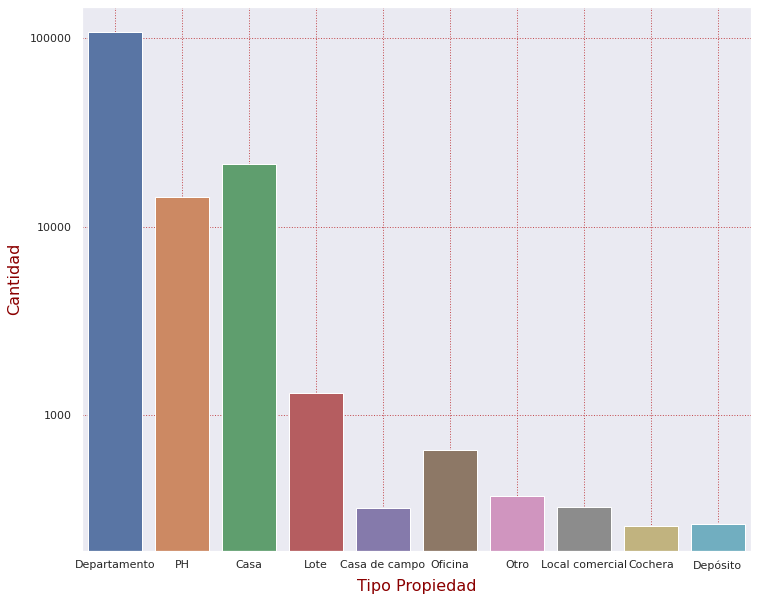

In [ ]:
# Con el "eje y en cantidades" y con el "eje x en tipos de propiedad"
plt.figure(figsize=(12,10))
plt.yscale('log')
ax = sns.countplot(data = data, x = "TipoPropiedad")
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("Tipo Propiedad", size=16, labelpad=8, color='darkred')
plt.ylabel("Cantidad", size=16, labelpad=8, color='darkred')
plt.grid(color='r', linestyle='dotted', linewidth=1)

**4.5 ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables l2 y l3. Si te animas, puedes hacer los dos gráficos usando subplot de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.**

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  fig.canvas.print_figure(bytes_io, **kw)


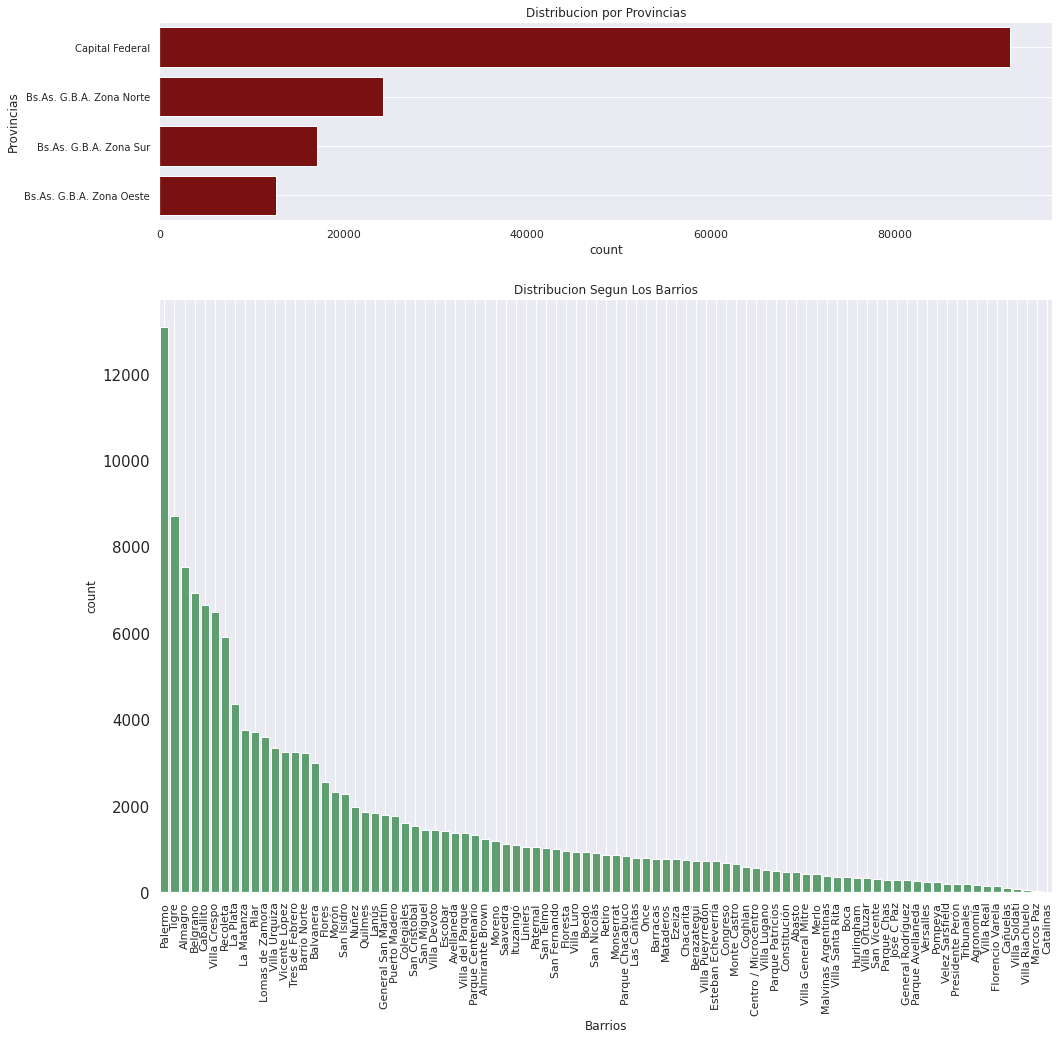

In [ ]:
fig= plt.subplots(figsize=(16,16),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=data,y="Provincias",order=data["Provincias"].value_counts().index,ax=ax1,color='darkred')

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion por Provincias", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=data,x="Barrios",order=data["Barrios"].value_counts().index,ax=ax2,color="g")


ax2.set_title("Distribucion Segun Los Barrios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="center")
plt.yticks(fontsize= 15)
ax1.grid()
ax2.grid()
plt.show()

Como se puede ver **en la distribución por Provincias la Capital Federal es aquella que más de estas posee**, en cuanto a la gráfica de Barrios, vemos barrios como Parlermo, Tigre, Almagro, Belgrano y caballito como aquellos que más propiedades tienen publicadas.

**Consultemos la cantidad por barrios:**

In [ ]:
data1 = data["Barrios"].value_counts()
data1

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: Barrios, Length: 89, dtype: int64

Como se puede observar son **en total 89 Barrios**, donde Palermo tiene una participación de aprox. un 66% más que el siguiente que es Tigre.

**Verifiquemos solo los 15 barrios con más cantidad de propiedades en el dataset:**

In [ ]:
data1 = data["Barrios"].value_counts().iloc[0:15]
data1


Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
Villa Crespo        6494
Recoleta            5917
La Plata            4354
La Matanza          3757
Pilar               3709
Lomas de Zamora     3599
Villa Urquiza       3339
Vicente López       3251
Tres de Febrero     3240
Barrio Norte        3229
Name: Barrios, dtype: int64

Como premisa fundamental en la revisión del trabajo para este sprint, la profesora nos expresó que es necesario tener el filtro indicado en el sprint 1, para nuestros datos, entonces eso es lo que haré en este momento. 

- Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
- Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
- Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.


In [ ]:
#Veamos la cantidad de registros que tenemos
data.shape

(146660, 19)

**Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.**

In [ ]:
# En esta instrucción hago un filtrado del data set de acuerdo a lo especificado anteriormente.
# En adelante muchos de los ejercicios los seguiré haciendo con estos datos filtrados.
dataPropiedades_02 = data[((data['TipoPropiedad'] == "Casa") |(data['TipoPropiedad'] == "Departamento") | (data['TipoPropiedad'] == "PH"))  & (data['Provincias'] == "Capital Federal")] 
print(dataPropiedades_02.head(5))
print(dataPropiedades_02.shape)

  FechaAltaAviso FechaBajaAviso  ... TipoPropiedad  TipoOperacion
0     2019-10-17     2019-12-23  ...  Departamento          Venta
1     2019-10-17     2019-11-21  ...            PH          Venta
2     2019-10-17     2019-11-01  ...            PH          Venta
3     2019-10-17     2019-12-23  ...            PH          Venta
5     2019-10-17     2019-11-01  ...            PH          Venta

[5 rows x 19 columns]
(91485, 19)


In [ ]:
print(dataPropiedades_02.shape)

(91485, 19)


# **En las siguientes líneas realizaré el filtrado de datos:**

**En la siguiente instrucción selecciono aquellas propiedades con superficie total sea menor a 1000 m2 y mayor a 15 m2.**

In [ ]:
superficie_min=15
superficie_max=1000
dataPropiedades_02 = dataPropiedades_02[(dataPropiedades_02.SuperficieTotal <= 1000) & (dataPropiedades_02.SuperficieTotal >= 15)]
print(dataPropiedades_02.shape)

(82405, 19)


**Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.**

In [ ]:
dataPropiedades_02 = dataPropiedades_02[(dataPropiedades_02.Precio <= 4000000)]
dataPropiedades_02.head()
print(dataPropiedades_02.shape)

(82373, 19)


**Antes de continuar quiero hacer algunos filtros sobre barrios, datos que quiero tener porque los barrios, al menos en Colombia son excelentes predictores de Precios de prodpiedades.**

**Veamos con el filtro que ya tenemos cuáles son los barrios más caros de la Capital Federal:**

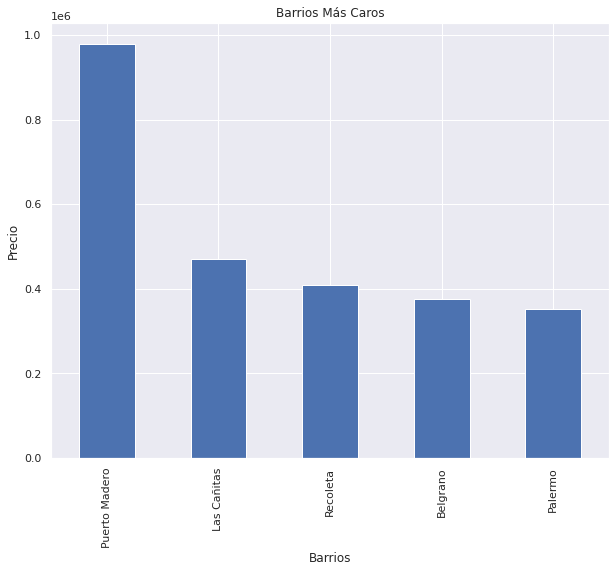

In [ ]:
#dataPropiedades_02.rename(columns={'Prop_l3_NivelAdm_3_Ciudad':'Barrios'})
table = pd.pivot_table(dataPropiedades_02, values='Precio', index=['Barrios'], aggfunc=np.mean)
mas_caros = table.sort_values('Precio', ascending=False).iloc[:5]
mas_caros

# Gráfica de los Barrios más caros
plt.title('Barrios Más Caros')
plt.xlabel('Barrios')
plt.ylabel('Precio')
mas_caros.Precio.nlargest(10).plot(kind='bar', figsize=(10,8))


**Veamos con el filtro que ya tenemos cuáles son los barrios más baratos de la Capital Federal:**

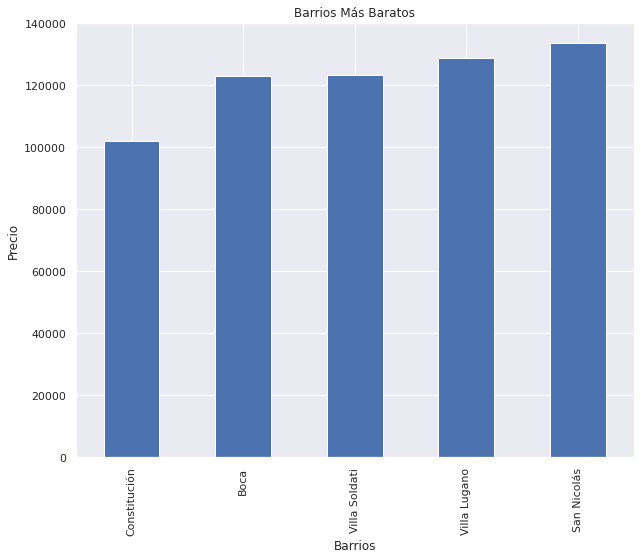

In [ ]:
table = pd.pivot_table(dataPropiedades_02, values='Precio', index=['Barrios'], aggfunc=np.mean) 
mas_baratos = table.sort_values('Precio', ascending=True).iloc[:5] 
mas_baratos

# Gráfica de los Barrios más baratos
plt.title('Barrios Más Baratos')
plt.xlabel('Barrios')
plt.ylabel('Precio')
mas_baratos.Precio.nsmallest(10).plot(kind='bar', figsize=(10,8))


**Para ir a acercándonos al objetivo que nos han pedido, luego de haber mostrado los datos anteriores, voy a a empezar a realizar filtrado sobre los datos:**

***4.6 Identificacion de columnas con un solo valor***


In [ ]:
for i in range(dataPropiedades_02.shape[1]):
    print(i,len(pd.unique(dataPropiedades_02.iloc[:,i])))


0 362
1 407
2 362
3 28939
4 29230
5 1
6 1
7 57
8 20
9 16
10 14
11 583
12 531
13 3787
14 1
15 37122
16 50099
17 3
18 1


**Haré la siguiente consulta para identificar los valores de las columnas que tienen un único valor:**

In [ ]:
print(dataPropiedades_02.apply(lambda col: col.unique()))

FechaAltaAviso               [2019-10-17, 2019-03-04, 2019-07-09, 2019-08-1...
FechaBajaAviso               [2019-12-23, 2019-11-21, 2019-11-01, 2019-10-3...
FechaAltaPrimVersionAviso    [2019-10-17, 2019-03-04, 2019-07-09, 2019-08-1...
UbicProp_Latitud             [-34.6058798, -34.624055600000005, -34.593569,...
UbicProp_Longitud            [-58.38494910000001, -58.41211020000001, -58.4...
Pais                                                               [Argentina]
Provincias                                                   [Capital Federal]
Barrios                      [San Cristobal, Boedo, Palermo, Villa Crespo, ...
Ambientes                    [7.0, 2.0, 1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0,...
Dormitorios                  [7.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0, 8.0, ...
Baños                        [2.0, 1.0, 3.0, 4.0, 5.0, nan, 6.0, 8.0, 7.0, ...
SuperficieTotal              [140.0, 70.0, 45.0, 85.0, 56.0, 66.0, 68.0, 50...
SuperficieCubierta           [140.0, 58.0, 45.0, 50.

**Decido eliminar las siguientes columnas dado que tanto en el proyecto anterior como en este leí el sitio oficial de https://blog.properati.com.co/category/propetati-data/data/ y además soy muy apasionada por todo lo que tiene que ver con propiedad raíz, y podría decir que las siguientes columnas no son necesarias** 

Las siguientes porque son columnas de valores unicos, estas pueden generar errores en los modelos de predicción ya que son pedictores de cero varianza, dado lo anterior procederé a eliminarlas, sabiendo que no voy a causar afectación.

**- Pais, Provincia, Moneda y tipo de operación **

Las siguientes columnas no son relevantes a la hora de predecir el Precio de una propiedad, pues las considero más como columnas informativas:

**- FechaAltaAviso, FechaBajaAviso, FechaAltaPrimVersionAviso, Titulo y Descripcion**

Según las distintas conversaciones que tuvimos en el curso, considero que la longitud y la latitud son variables que no nos sirve para predecir, esta información la puedo obtener de los barrios, así que opto por obviar latitud y longitud, pues son datos que podrían ser muy subjetivos, ya que ciertas latitudes y longitudes no son necesariamente indicativo de representar que las propiedades sean costosas, pues hay propiedades cercanas y las separa por ejemplo un rio y a un lado del rio es más costosa y al otro lado menos, teniendo una longitud y latitud demasiado similar, algo que podría darnos más valor son los barrios de las propiedades, quizá si tienen bibliotecas, zonas de diversión, museos, lugares históricos.

Las latitudes van entre +180 y -180, a pesar de ser numérica tendríamos que codificarla para usarla en los modelos, habría que buscar la forma de codificarla para usarla en los modelos, de modo que signifique algo para el modelo. Barrios y tipos de propiedad son bastante relevantes para este modelo.

**- UbicProp_Latitud y UbicProp_Longitud**



**Creamos un nuevo dataset llamado dataPropiedades_03 solo con las columnas que necesitamos, eliminando aquellas que no requerimos:**





In [ ]:
dataPropiedades_03 = dataPropiedades_02.drop(["Pais","Provincias","Moneda","TipoOperacion", "FechaAltaAviso","FechaBajaAviso","FechaAltaPrimVersionAviso","Titulo","Descripcion", "UbicProp_Longitud", "UbicProp_Latitud"],axis=1)

In [ ]:
dataPropiedades_03.columns

Index(['Barrios', 'Ambientes', 'Dormitorios', 'Baños', 'SuperficieTotal',
       'SuperficieCubierta', 'Precio', 'TipoPropiedad'],
      dtype='object')

**Procedo a ejecutar nuevamente la consulta de valores únicos** y observo que mi nuevo dataset (data_propiedades_03 ya no cuenta con las columnas mencionadas, estas fueron eliminadas)

In [ ]:
print(dataPropiedades_03.apply(lambda col: col.unique()))

Barrios               [San Cristobal, Boedo, Palermo, Villa Crespo, ...
Ambientes             [7.0, 2.0, 1.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0,...
Dormitorios           [7.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 0.0, 8.0, ...
Baños                 [2.0, 1.0, 3.0, 4.0, 5.0, nan, 6.0, 8.0, 7.0, ...
SuperficieTotal       [140.0, 70.0, 45.0, 85.0, 56.0, 66.0, 68.0, 50...
SuperficieCubierta    [140.0, 58.0, 45.0, 50.0, 56.0, 70.0, 37.0, 49...
Precio                [153000.0, 159000.0, 125000.0, 295000.0, 15000...
TipoPropiedad                                  [Departamento, PH, Casa]
dtype: object


**Sobre nuestro nuevo dada set verifiquemos las columnas y su porcentaje de valores en cero:**

In [ ]:
dataPropiedades_03.isna().sum()/data.shape[0]*100


Barrios               0.000000
Ambientes             0.000000
Dormitorios           0.000000
Baños                 0.600027
SuperficieTotal       0.000000
SuperficieCubierta    0.352516
Precio                0.000000
TipoPropiedad         0.000000
dtype: float64

**Con la siguiente instrucción identifico  columnas con pocos valores:**


In [ ]:
print(dataPropiedades_03.shape[1])
for i in range(dataPropiedades_03.shape[1]):
    num=len(pd.unique(dataPropiedades_03.iloc[:,i]))
    porcentaje=float(num)/dataPropiedades_03.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

8
0, 57, 0.1%
1, 20, 0.0%
2, 16, 0.0%
3, 14, 0.0%
4, 583, 0.7%
5, 531, 0.6%
6, 3787, 4.6%
7, 3, 0.0%


**Ejecutemos la siguiente instrucción para mostrar gráficamente**, cuáles columnas tienen menos valores del total:

**Pero antes de esto miremos cuántas filas tenemos:**

In [ ]:
dataPropiedades_03.shape

(82373, 8)

**En esta gráfica aquellas variables o columnas que tengan un valor menor al valor total de los datos mostrados anteriormente en el dataPropiedades_03.shape, es porque tienen valores faltanes.**



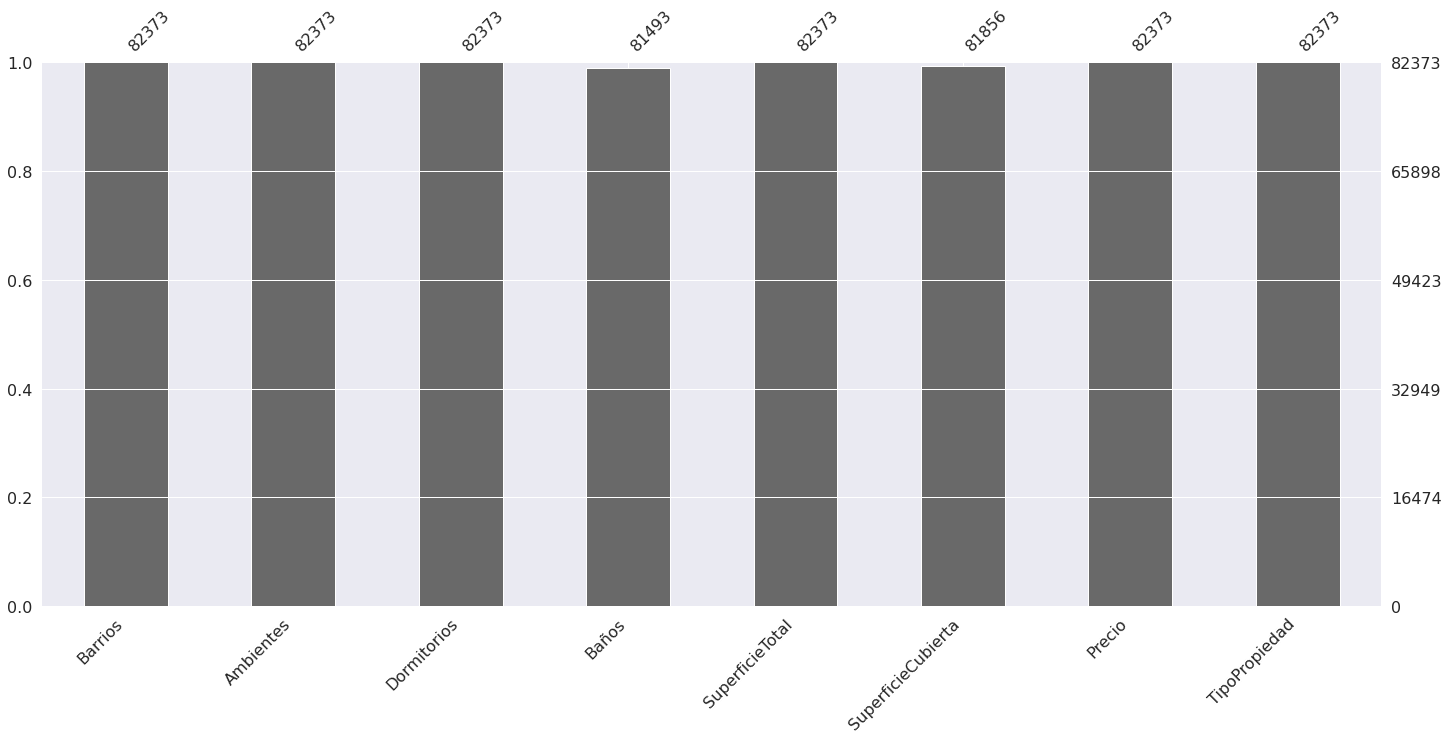

In [ ]:
msno.bar(dataPropiedades_03)

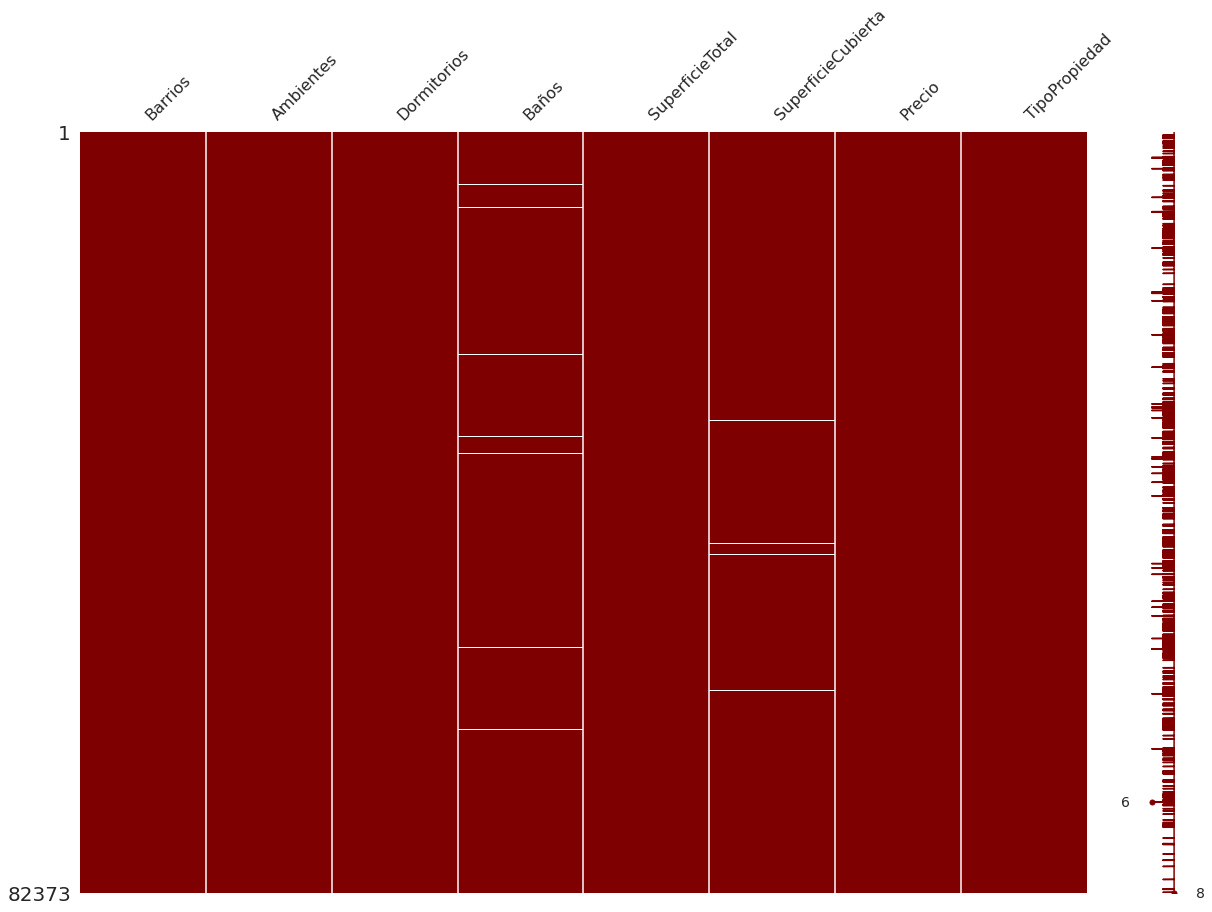

In [ ]:
#import missingno as msno
msno.matrix(dataPropiedades_03, figsize=(20,14), color=(0.5,0,0))

En este gráfico se observa que los valores faltantes estarían donde lo están las líneas blancas.

**Ejecutemos un mapa de calor que nos indica la correlación entre las variables que tienen valores faltantes:**

- UbicProp_Latitud 3.091504
- UbicProp_Longitud 3.101050
- Baños 1.480295
- SuperficieTotal 6.080049
- SuperficieCubierta 6.296877

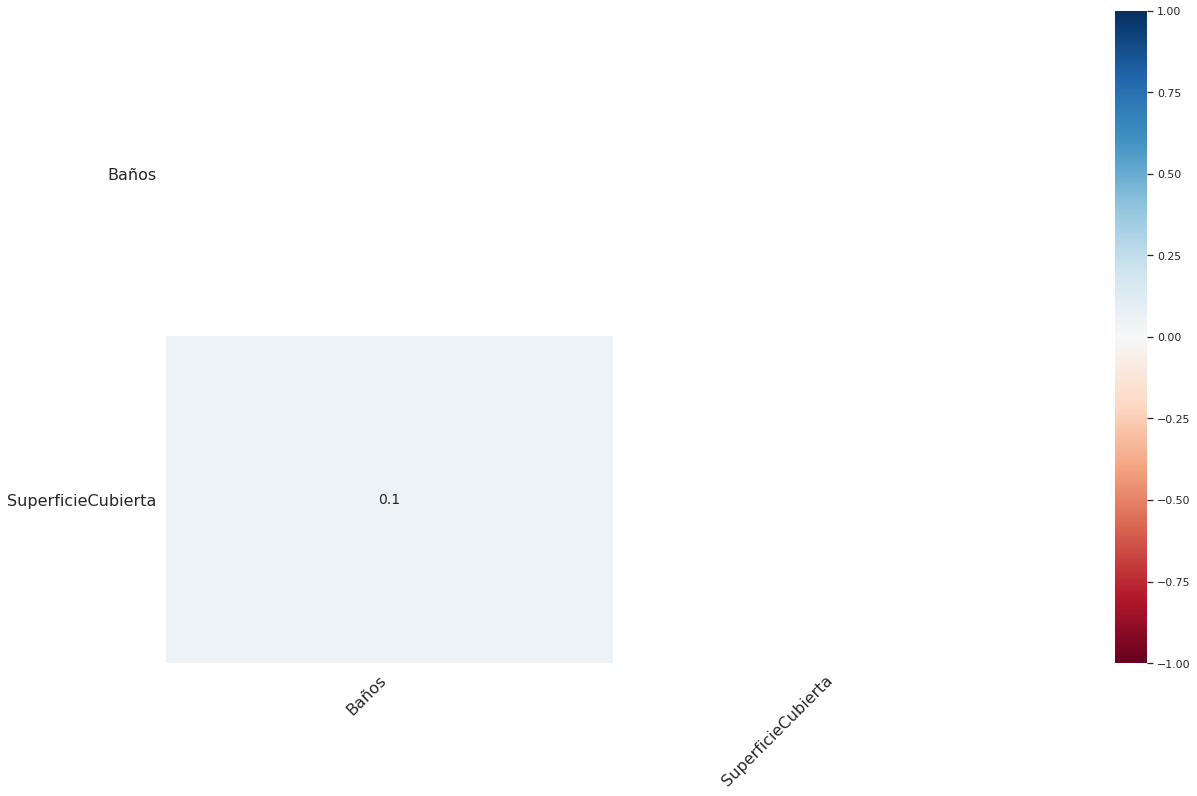

In [ ]:
msno.heatmap(dataPropiedades_03)

**Análisis del mapa de calor:**

La correlación de nulidad varía de -1 (si una variable aparece, la otra definitivamente no) a 0 (las variables que aparecen o no aparecen no tienen efecto entre sí) y 1 (si una variable aparece, la otra definitivamente también lo hace). 
Las variables que siempre están llenas o siempre vacías no tienen una correlación significativa, por lo que se eliminan de la visualización.

Las entradas marcadas con <1 o >-1 tienen una correlación cercana a ser exactamente negativa o positiva, pero todavía no es del todo perfecta. Esto apunta a una pequeña cantidad de registros en el conjunto de datos que son erróneos.
En otras palabras:
- Un valor cercano a -1 significa que si aparece una variable, es muy probable que falte la otra.
- Un valor cercano a 0 significa que no hay dependencia entre la ocurrencia de valores perdidos de dos variables.
- Un valor cercano a 1 significa que si aparece una variable, es muy probable que la otra variable esté presente.

**Para mayor claridad ejecutemos nuevamente la instruccion de las columnas del dataset que nos quedó:**

In [ ]:
dataPropiedades_03.columns

Index(['Barrios', 'Ambientes', 'Dormitorios', 'Baños', 'SuperficieTotal',
       'SuperficieCubierta', 'Precio', 'TipoPropiedad'],
      dtype='object')

Hay un aspecto relevante que descrubrí en el trabajo del sprint 1, y que veo necesario aplicar acá, y es que no podrían haber superficies cubiertas en las propiedades de nuestro dataset, mayores a las superficies totales.
Realicé una organización de los datos para eliminar esta inconsistencia:


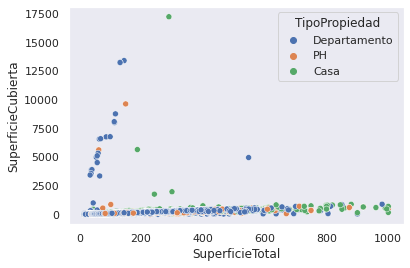

In [ ]:
sns.scatterplot(data=dataPropiedades_03, x='SuperficieTotal', y='SuperficieCubierta', hue="TipoPropiedad", palette="deep")
plt.grid()
plt.show()

**Acá se tienen dos decisiones cuando la superficie cubierta sea mayor a la total:**
- Eliminar aquellos registros donde la superficie cubierta sea mayor a la total 
- o asignarle a superficie cubierta el valor de la superficie total cuando se cumpla dicha condición, esta segunda opción no me gusta mucho porque si alguien ingresó una superficie cubierta mayor a la total pudo haber sido por error y quizá me quede con datos que no puedo identificar si son o no reales, podría tomar una decisión errada.

En este caso lo que lo haré es directamente eliminar sobre el dataset datapropiedades_03 aquellos registros que cumplan la condición. 

In [ ]:
print('Registros que tiene la condición cuya superficie cubierta es mayor a la total:\n', dataPropiedades_03[dataPropiedades_03['SuperficieCubierta'] > dataPropiedades_03['SuperficieTotal']])

Registros que tiene la condición cuya superficie cubierta es mayor a la total:
                  Barrios  Ambientes  ...    Precio  TipoPropiedad
446     Villa Santa Rita        5.0  ...  490000.0           Casa
859             Belgrano        3.0  ...  133000.0   Departamento
924     Villa Pueyrredón        3.0  ...  187000.0   Departamento
1329            Recoleta        2.0  ...  235000.0   Departamento
1438            Congreso        3.0  ...  235000.0   Departamento
...                  ...        ...  ...       ...            ...
145138         Caballito        1.0  ...   54900.0   Departamento
145146       San Nicolás        1.0  ...   48000.0   Departamento
145262      Villa Crespo        3.0  ...  127000.0   Departamento
145376          Barracas        6.0  ...  329900.0           Casa
145383          Barracas        7.0  ...   99000.0           Casa

[751 rows x 8 columns]


In [ ]:
# A continuación borro del dataset que venía trabajando, aquellas propiedades donde la superficie cubierta sea mayor a la total.
dataPropiedades_03.drop(dataPropiedades_03.loc[dataPropiedades_03['SuperficieCubierta'] >dataPropiedades_03['SuperficieTotal']].index,inplace=True ,axis=0)
# Imprimo los valores que coinciden con la búsqueda


***Se borran 751 filas.***

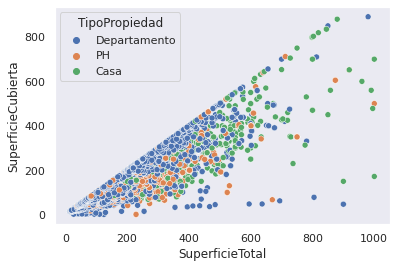

In [ ]:
sns.scatterplot(data=dataPropiedades_03, x='SuperficieTotal', y='SuperficieCubierta', hue="TipoPropiedad", palette="deep")
plt.grid()
plt.show()

Como podemos observar ya no hay valores de superficie cubierta mayores a la tota.

**Voy a realizar un mapa de calor:**

En este caso realizo dos tipos de mapas de calor para ejemplificar mejor:

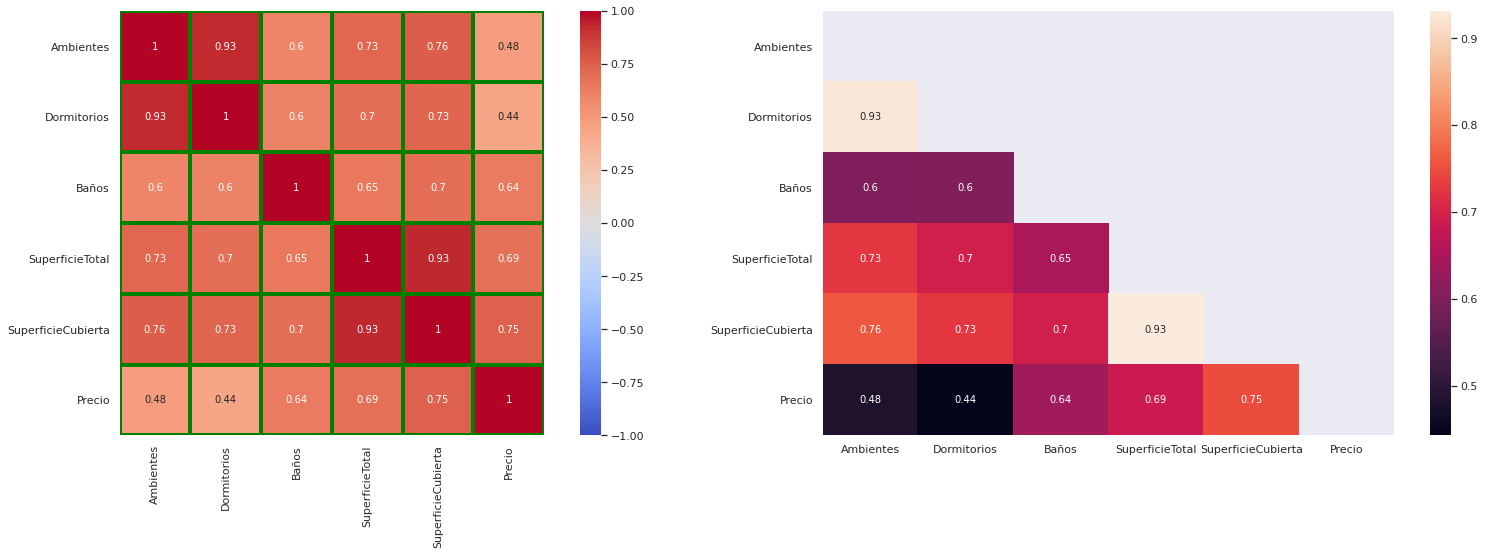

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9))
fig.tight_layout(pad=10.0)

sns.heatmap(dataPropiedades_03.corr(), annot = True, cbar = True,  square = True, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='green',ax=ax1)

matrix = np.triu(dataPropiedades_03.corr())
sns.heatmap(dataPropiedades_03.corr(), annot=True, linecolor='black', mask=matrix,ax=ax2)

***Las principales conclusiones a las que podemos llegar son:***

- Si dos variables distintas a mi variable objetivo están altamente correlacionadas podría concluir que a ambas no las tenga en cuenta a la hora de considerarlas como predictoras, podría prescindir de una de ellas.
- Si hay una alta correlación entre mi variable objetivo y otra variable, no puedo prescindir de esta última porque es una excelente predictora en mi modelo.

**Veamos el análisis de correlación:**

0.	Entre Ambientes y dormitorios hay una correlación de 0.93), esto indica que entre más ambientes tenga una propiedad, mayor cantidad de dormitorios puede tener, se puede tomar la decisión de eliminar una de las dos, NO es este el momento de hacerlo dato que estamos en el paso de Análisis exploratorio más no en el pre-procesamiento.

- La gráfica me ayudaría a deducir que es Dormitorios la candidata a eliminar pues es más baja la correlación entre Precio y Dormitorios (0.44) que Precio y Ambientes (0.48).

1.	Entre Ambientes:
- a.	Superficie total una correlación de 0.73
- b.	Superficie cubierta una correlación de 0.76
- c.	Baños una correlación de 0.6
- d.	Precio 0.48
Lo anterior puede llevar a deducir que una mayor cantidad de ambientes se puede dar en propiedades más grandes, lo mismo podríamos decir de baños, pues a mayor ambientes mayor cantidad de baños.
Lo que no es muy fuerte es la correlación entre Precio y ambiente, pues está por debajo de 0.48, menor de un 50%
2.	Con respecto a Dormitorios podríamos decir que la mayor correlación esta con:
- a.	Superficie cubierta 0.73
- b.	Superficie total 0.7
- c.	Baños 0.6
- d.	Precio 0.44
Lo anterior puede llevar a deducir que una mayor cantidad de Dormitorios se puede dar en propiedades más grandes, lo mismo podríamos decir de baños, pues a mayor Dormitorios mayor cantidad de baños.
Lo que no es muy fuerte es la correlación entre Precio y Dormitorios, pues está por debajo del 50% con un 0.44. 

3.	Con respecto a Baños podríamos decir que la mayor correlación esta con;
- a.	Superficie cubierta 0.7
- b.	Superficie total 0.65
- c.	Precio 0.64
Lo anterior puede llevar a deducir que una mayor cantidad de Baños se puede dar en propiedades más grandes.
Hay una correlación considerable entre Precio y Baños, pues está por encima del 50% con un 0.64, lo que nos llevaría a pensar que a mayor cantidad de Baños, mayor es el Precio de la propiedad.
4.	Entre superficie total y cubierta hay una gran correlación, 0.93, nos llevaría a pensar que una de las dos variables sobra.

Si quiero eliminar entre superficie total y cubierta, la gráfica me ayudaría a deducir que es Superficie total la candidata pues es más alta la correlación entre Precio y Superficie Cubierta (0.75) que Precio y Superficie Total (0.69).

5.	Si observamos las correlaciones de La ubicación en latitud y la ubicación en longitud (0,18 y 0,19) respectivamente con respecto al precio, esto da a entender que posiblemente la ubicación no sale siendo un valor altamente significante en el precio, algo que habría que profundizar más adelante.




**Es muy aconsejable generar un pairplot una vez filtrado el dataset, así veremos las correlaciones entre las distintas variables, muy similar a lo mostrado en el mapa de calor, más de una forma gráfica diferente:**

<Figure size 432x288 with 0 Axes>

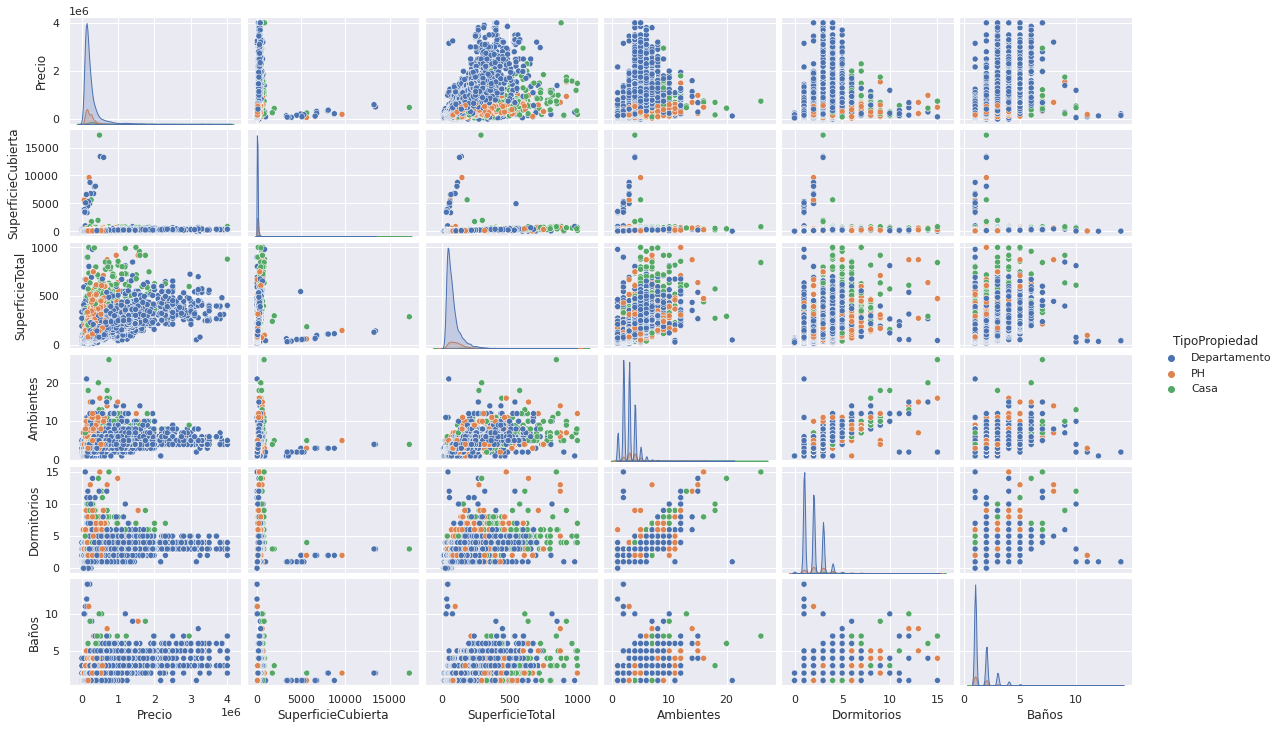

In [ ]:
# Miremos la relación Ambientes, Dormitorios, Baños, superficie total, superficie cubierta y  entre precio,  categorizando por Tipo Propiedad y 
#con la provincia Capital Federal, dataset obtenido anteriormente. 

figz= plt.figure()
mascara_columnas= ["TipoPropiedad","Precio","SuperficieCubierta","SuperficieTotal","Ambientes","Dormitorios","Baños"]
graph=sns.pairplot(dataPropiedades_02[mascara_columnas],hue="TipoPropiedad")
graph.fig.set_size_inches(18,10)
plt.grid()
plt.show()

**Voy a ejecutar las estadísticas de mis variables para observar cómo vamos hasta el momento, aclaro no he tomado la decisión de prescindir de la latitud y la longitud porque no tengo argumentos aún de dejarlas o eliminarlas, además siento que para los pasos siguientes me pueden servir.**

In [ ]:
dataPropiedades_03.describe()

Ambientes   Dormitorios  ...  SuperficieCubierta        Precio
count  81622.000000  81622.000000  ...        81105.000000  8.162200e+04
mean       3.003418      1.997905  ...           81.992257  2.631458e+05
std        1.296908      1.044850  ...           61.487416  2.982065e+05
min        1.000000      0.000000  ...            1.000000  6.000000e+03
25%        2.000000      1.000000  ...           44.000000  1.250000e+05
50%        3.000000      2.000000  ...           63.000000  1.800000e+05
75%        4.000000      3.000000  ...           95.000000  2.800000e+05
max       26.000000     15.000000  ...          891.000000  4.000000e+06

[8 rows x 6 columns]

Puedo observar que entre mis variables predictoras (es decir diferentes a Precio) la mayor varianza está en la variable superficie Total, seguida de la Superficie Cubierta, luego Dormitorios, Ambientes y  Baños.

**Entonces como mi primer paso va a ser analizar y posiblemente eliminar outliers mi primer variable será "SuperficieTotal"**

# **AHORA SI VOY A EMPEZAR CON EL PRE-PROCESAMIENTO DE MIS DATOS.**

# Parte A - Detección y eliminación de Outliers 

Recordemos que el diagrama de caja (El boxplot), resume la distribución de los datos mostrándonos la posición de sus cuartiles y de los valores atípicos (outliers)."

Veamos la siguiente imagen tomada de:

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

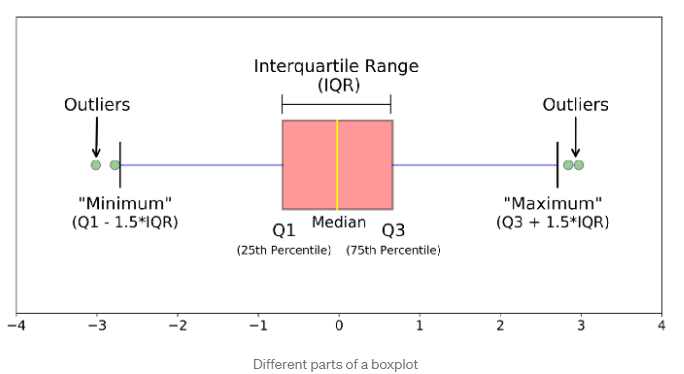

**Me gustaría ejecutar un boxplot por cada una de las variables que estamos evaluando para hacernos una idea gráfica de los outliers:**

Aunque en mis columnas tengo longitud y latitud, por ahora no las voy a analizar, sino que me concentraré en las otras variables.


In [ ]:
# Voy a realizar una copia del dataset que vengo trabajando
dataPropiedades_04 = dataPropiedades_03.copy()
dataPropiedades_04.shape

(81622, 8)

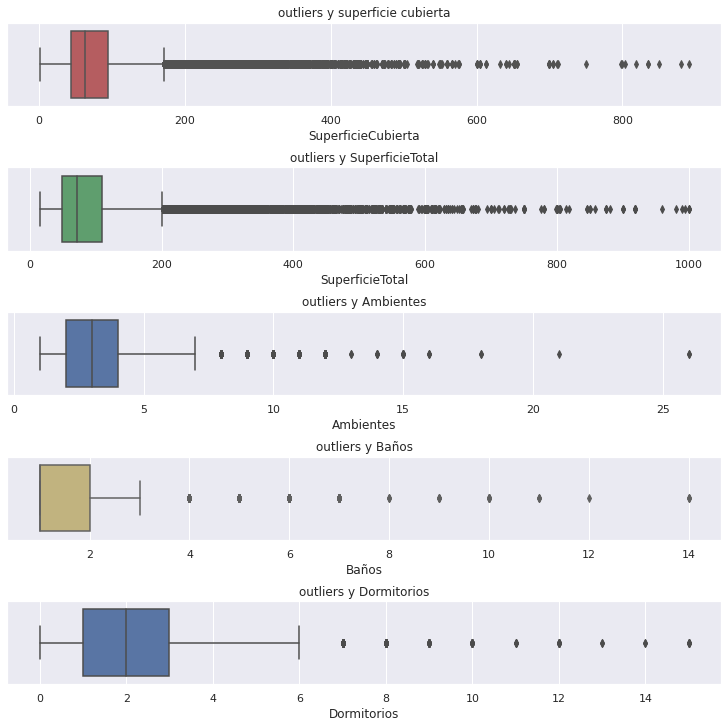

In [ ]:
#fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,constrained_layout=True,figsize=(10,10))
#fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,constrained_layout=True,figsize=(10,10))

ax1.set_title("outliers y superficie cubierta")
ax2.set_title("outliers y SuperficieTotal")
ax3.set_title("outliers y Ambientes")
ax4.set_title("outliers y Baños")
ax5.set_title("outliers y Dormitorios")


sns.boxplot(data=dataPropiedades_04,x="SuperficieCubierta",ax=ax1, color='r')
sns.boxplot(data=dataPropiedades_04,x="SuperficieTotal",ax=ax2,color='g')
sns.boxplot(data=dataPropiedades_04,x="Ambientes",ax=ax3,color='b')
sns.boxplot(data=dataPropiedades_04,x="Baños",ax=ax4, color='y')
sns.boxplot(data=dataPropiedades_04,x="Dormitorios",ax=ax5,color='b')

In [ ]:
dataPropiedades_04["SuperficieTotal"].value_counts().sort_index()

15.0       6
16.0       9
17.0      13
18.0      23
19.0      14
          ..
960.0      1
980.0      1
990.0      1
995.0      1
1000.0     3
Name: SuperficieTotal, Length: 582, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


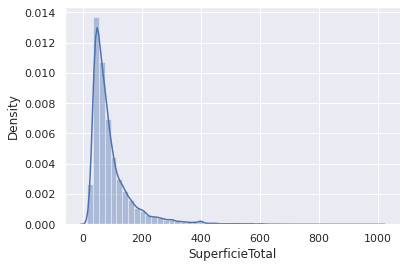

In [ ]:
# Hacé el distplot 
ax = sns.distplot(dataPropiedades_04['SuperficieTotal'])

In [ ]:
# Realizar el filtrado intercuartílico en esta celda
df_filtered = dataPropiedades_04
Q1 = df_filtered['SuperficieTotal'].quantile(0.25)
Q3 = df_filtered['SuperficieTotal'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = dataPropiedades_04.query('(@Q1 - 1.5 * @IQR) <= SuperficieTotal <= (@Q3 + 1.5 * @IQR)')
print('Q1=',Q1)
print('Q3=',Q3)

# Máximo mínimo
ValorMinimo = Q1 - (IQR*1.5)
# Máximo valor
ValorMaximo = Q3 + (IQR*1.5)
print("La Superficie Total maxima en es {}, y la superficie Total minima  es {} y el IQR {}" .format(ValorMaximo,ValorMinimo,IQR))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Q1= 49.0
Q3= 110.0
La Superficie Total maxima en es 201.5, y la superficie Total minima  es -42.5 y el IQR 61.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
# Esta es otra forma de hacerlo - solo lo dejo acá para verificar que el código anterior esté correcto
q25,q75 = np.percentile(dataPropiedades_04.SuperficieTotal, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

49.0 110.0 61.0 -42.5 201.5


In [ ]:
#dataPropiedades_04["SuperficieTotal"] = (dataPropiedades_04.SuperficieTotal <= superifice_Total_maxima) & (dataPropiedades_04.SuperficieTotal >=superifice_Total_minima)


In [ ]:
print(df_filtered.shape)

(75437, 8)


In [ ]:
# Voy a realizar una copia del dataset que vengo trabajando

dataPropiedades_04 = df_filtered.copy()
dataPropiedades_04.shape

(75437, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


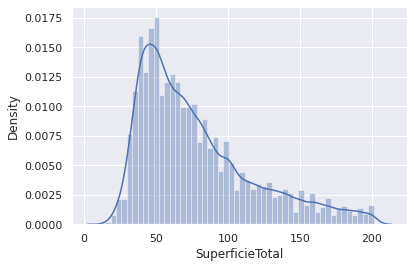

In [ ]:
# Hacé el distplot 
ax = sns.distplot(dataPropiedades_04['SuperficieTotal'])

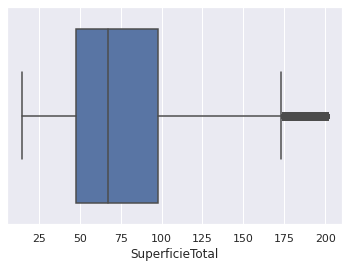

In [ ]:
sns.boxplot(x=dataPropiedades_04['SuperficieTotal'])

**Ejecuto las estadísticas para continuar con los outliers:**

In [ ]:
dataPropiedades_04.describe()

Ambientes   Dormitorios  ...  SuperficieCubierta        Precio
count  75437.00000  75437.000000  ...        74949.000000  7.543700e+04
mean       2.81973      1.861805  ...           69.078787  2.135005e+05
std        1.07612      0.906159  ...           34.421533  1.538769e+05
min        1.00000      0.000000  ...            1.000000  6.000000e+03
25%        2.00000      1.000000  ...           43.000000  1.200000e+05
50%        3.00000      2.000000  ...           60.000000  1.699000e+05
75%        4.00000      2.000000  ...           85.000000  2.519000e+05
max       21.00000     15.000000  ...          201.000000  3.249900e+06

[8 rows x 6 columns]

**Como podemos ver ambas disminuyeron tanto la superficie cubierta como la total, pues recordemos cómo estaba:**
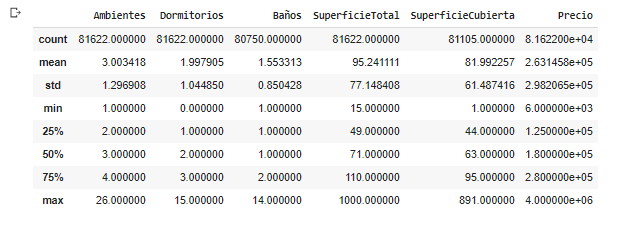

**Conclusión:**

Como veo que la varianza de la supertifie cubierta mejoró al eliminar los  outliers de la superticie total.

**Voy a seguir con los outliers de Ambientes:**

In [ ]:
# Realizar el filtrado intercuartílico en esta celda
df_filtered = dataPropiedades_04
Q1 = df_filtered['Ambientes'].quantile(0.25)
Q3 = df_filtered['Ambientes'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = dataPropiedades_04.query('(@Q1 - 1.5 * @IQR) <= Ambientes <= (@Q3 + 1.5 * @IQR)')

# Máximo mínimo
ValorMinimo = Q1 - (IQR*1.5)
# Máximo valor
ValorMaximo = Q3 + (IQR*1.5)
print("Ambientes maxima en es {}, y Ambientes minima  es {} y el IQR {}" .format(ValorMaximo,ValorMinimo,IQR))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Ambientes maxima en es 7.0, y Ambientes minima  es -1.0 y el IQR 2.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
df_filtered.shape

(75299, 8)

In [ ]:
dataPropiedades_04 = df_filtered.copy()
dataPropiedades_04.shape

(75299, 8)

In [ ]:
dataPropiedades_04.describe()

Ambientes   Dormitorios  ...  SuperficieCubierta        Precio
count  75299.000000  75299.000000  ...        74811.000000  7.529900e+04
mean       2.809307      1.853199  ...           68.915480  2.133961e+05
std        1.047523      0.881421  ...           34.217954  1.539368e+05
min        1.000000      0.000000  ...            1.000000  6.000000e+03
25%        2.000000      1.000000  ...           43.000000  1.200000e+05
50%        3.000000      2.000000  ...           60.000000  1.695000e+05
75%        3.000000      2.000000  ...           85.000000  2.500000e+05
max        7.000000     15.000000  ...          201.000000  3.249900e+06

[8 rows x 6 columns]

Así estaba:


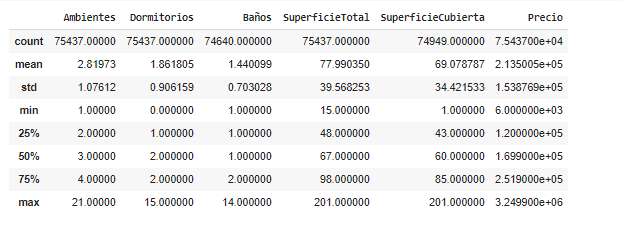

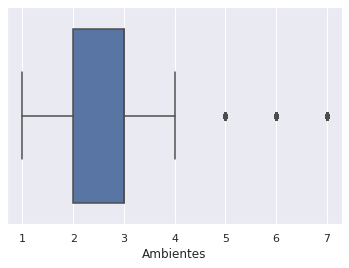

In [ ]:
sns.boxplot(x=dataPropiedades_04['Ambientes'])

**Conntinuo con los outliers de Dormitorios:**

In [ ]:
# Realizar el filtrado intercuartílico en esta celda
df_filtered = dataPropiedades_04
Q1 = df_filtered['Dormitorios'].quantile(0.25)
Q3 = df_filtered['Dormitorios'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = dataPropiedades_04.query('(@Q1 - 1.5 * @IQR) <= Dormitorios <= (@Q3 + 1.5 * @IQR)')

# Máximo mínimo
ValorMinimo = Q1 - (IQR*1.5)
# Máximo valor
ValorMaximo = Q3 + (IQR*1.5)
print("Dormitorios maxima en es {}, y Dormitorios minima  es {} y el IQR {}" .format(ValorMaximo,ValorMinimo,IQR))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Dormitorios maxima en es 3.5, y Dormitorios minima  es -0.5 y el IQR 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
dataPropiedades_04.shape

(75299, 8)

In [ ]:
dataPropiedades_04 = df_filtered.copy()
dataPropiedades_04.shape

(72875, 8)

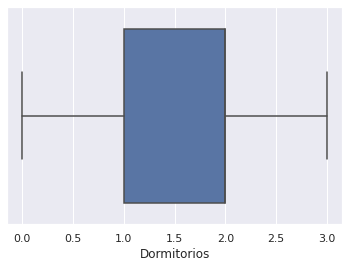

In [ ]:
# Hacé el boxplot en esta celda
sns.boxplot(x=dataPropiedades_04['Dormitorios'])

In [ ]:
dataPropiedades_04.describe()

Ambientes   Dormitorios  ...  SuperficieCubierta        Precio
count  72875.000000  72875.000000  ...        72403.000000  7.287500e+04
mean       2.730593      1.776727  ...           66.831319  2.098597e+05
std        0.963802      0.781999  ...           32.250109  1.530516e+05
min        1.000000      0.000000  ...            1.000000  6.000000e+03
25%        2.000000      1.000000  ...           43.000000  1.199000e+05
50%        3.000000      2.000000  ...           58.000000  1.670000e+05
75%        3.000000      2.000000  ...           81.000000  2.480000e+05
max        7.000000      3.000000  ...          200.000000  3.249900e+06

[8 rows x 6 columns]

**Voy a ejecutar los outliers para Baños:**

In [ ]:
# Realizar el filtrado intercuartílico en esta celda
df_filtered = dataPropiedades_04
Q1 = df_filtered['Baños'].quantile(0.25)
Q3 = df_filtered['Baños'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = dataPropiedades_04.query('(@Q1 - 1.5 * @IQR) <= Baños <= (@Q3 + 1.5 * @IQR)')

# Máximo mínimo
ValorMinimo = Q1 - (IQR*1.5)
# Máximo valor
ValorMaximo = Q3 + (IQR*1.5)
print("Baños maxima en es {}, y Baños minima  es {} y el IQR {}" .format(ValorMaximo,ValorMinimo,IQR))

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Baños maxima en es 3.5, y Baños minima  es -0.5 y el IQR 1.0
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
df_filtered.shape

(71259, 8)

In [ ]:
dataPropiedades_04 = df_filtered.copy()
dataPropiedades_04.shape

(71259, 8)

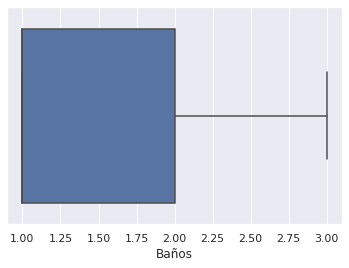

In [ ]:
# Hacé el boxplot en esta celda
sns.boxplot(x=dataPropiedades_04['Baños'])


**Vamos a ver cómo nos quedaron las estadísticas luego de eliminar outliers:**

In [ ]:
dataPropiedades_04.describe()

Ambientes   Dormitorios  ...  SuperficieCubierta        Precio
count  71259.000000  71259.000000  ...        70831.000000  7.125900e+04
mean       2.718492      1.766065  ...           66.006748  2.052088e+05
std        0.957670      0.775986  ...           31.271435  1.423193e+05
min        1.000000      0.000000  ...            1.000000  6.000000e+03
25%        2.000000      1.000000  ...           43.000000  1.190000e+05
50%        3.000000      2.000000  ...           58.000000  1.650000e+05
75%        3.000000      2.000000  ...           80.000000  2.450000e+05
max        7.000000      3.000000  ...          200.000000  3.249900e+06

[8 rows x 6 columns]

**Conclusión:**
Podemos ver unas varianzas bastantes aceptables para cada una de las variables que estamos trabajando.

Volvamos a ejecutar las gráficas de outliers:

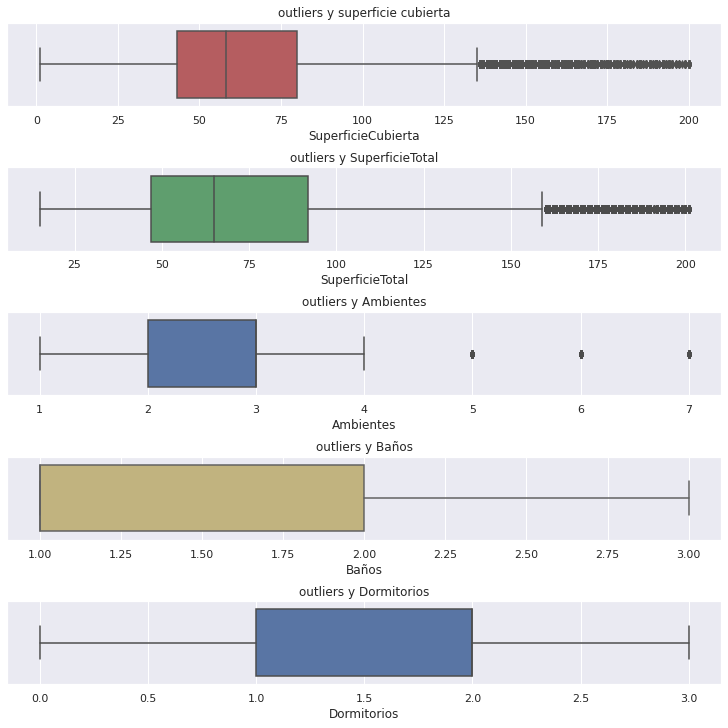

In [ ]:
#fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,constrained_layout=True,figsize=(10,10))
#fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(3,constrained_layout=True,figsize=(10,10))
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,constrained_layout=True,figsize=(10,10))

ax1.set_title("outliers y superficie cubierta")
ax2.set_title("outliers y SuperficieTotal")
ax3.set_title("outliers y Ambientes")
ax4.set_title("outliers y Baños")
ax5.set_title("outliers y Dormitorios")


sns.boxplot(data=dataPropiedades_04,x="SuperficieCubierta",ax=ax1, color='r')
sns.boxplot(data=dataPropiedades_04,x="SuperficieTotal",ax=ax2,color='g')
sns.boxplot(data=dataPropiedades_04,x="Ambientes",ax=ax3,color='b')
sns.boxplot(data=dataPropiedades_04,x="Baños",ax=ax4, color='y')
sns.boxplot(data=dataPropiedades_04,x="Dormitorios",ax=ax5,color='b')

**Podemos concluir que luego de eliminados los outliers la varianza de las variables ha mejorado significativamente y estamos listos para continuar con el siguiente proceso**

**Volvamos a ejecutar el mapa de calor que he venido ejecutando para saber cómo es la correlación:**

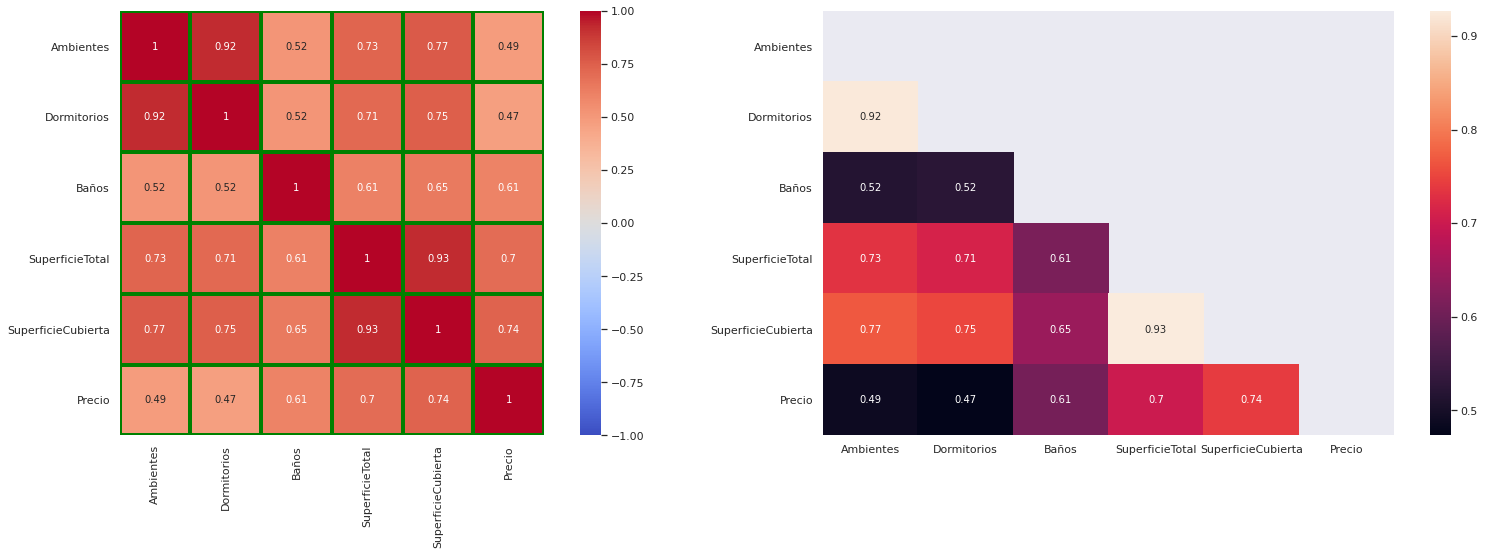

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9))
fig.tight_layout(pad=10.0)

sns.heatmap(dataPropiedades_04.corr(), annot = True, cbar = True,  square = True, vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='green',ax=ax1)

matrix = np.triu(dataPropiedades_04.corr())
sns.heatmap(dataPropiedades_04.corr(), annot=True, linecolor='black', mask=matrix,ax=ax2)

**Conclusiones:**

Voy a enfatizar en las siguientes correlaciones:

1. Ambientes con:
- a: Dormitorios 0.92 

2. Baños con:
- a: Superficie cubierta con 0.65

3. Superficie total con: 
- a: Superficie Cubierta: 0.93

4. Precio
- a: Superficie cubierta: 0.74

# **Parte A: Imputacion de Valores Faltantes**

***Veamos alguna teoría y preparemos los datos:***

**Recordemos que cuando empezamos este sprint nos enseñaron qué hacemos con los valores faltantes**

Y nos indicaron que existen diferentes estrategias para lidiar con valores faltantes. 

Como siempre, la respuesta a cuál es la mejor dependerá del problema que estemos estudiando y del mecanismo por el cual se hayan generado esos valores faltantes. Nos contaron tres:

***1. Eliminar los datos con problemas:*** 

 Es una estrategia sencilla y a veces, efectiva. Se puede hacer de dos formas:

**Eliminamos las instancias (por fila) que tienen algún valor faltante:**
Si tenemos muchas instancias, y son muy pocas las que tienen valores faltantes, esto no suele ser un problema. Pero siempre hay que hacerlo con cuidado, ya que puede sesgar nuestros resultados: Esto fue lo que realicé al principio de este notebook,  basada en los análisis realizados.

**Imputación:** 
Esta es una de las estrategias más utilizadas, junto con la eliminación de datos. Consiste en rellenar los valores faltantes con estadísticos obtenidos de los datos que sí tenemos.

Podría ser que los datos de  una columna con valores faltantes, sean imputados con el promedio, la mediana o la moda de esa columna.

Estrategias más elaboradas nos permiten imputar valores faltantes instancias teniendo en cuenta los valores de otros atributos:
- Agregar una variable dummy
- Entrenar un modelo de Machine Learning para predecir la variable de interés con los datos sin valores faltantes y usamos ese modelo para imputar las instancias con valores faltantes

Voy a elegir imputar con Knn imputer pues investigué sobre el mismo, y encontré que es muy poderoso, en este Modelo basado en distancia los valores se van completando usando datos que se parecen entre sí, el algoritmo del vecino más cercano (KNN) ha demostrado ser eficaz, la técnica conocida como  “imputación del vecino más cercano.” o modelo de vecindad K-nearest, determina que una nueva muestra se imputa encontrando las muestras en el conjunto de entrenamiento “más cercano” a ella y promedia estos puntos cercanos para completar el valor.




# Con sklearn se tienen cuatro imputadores:

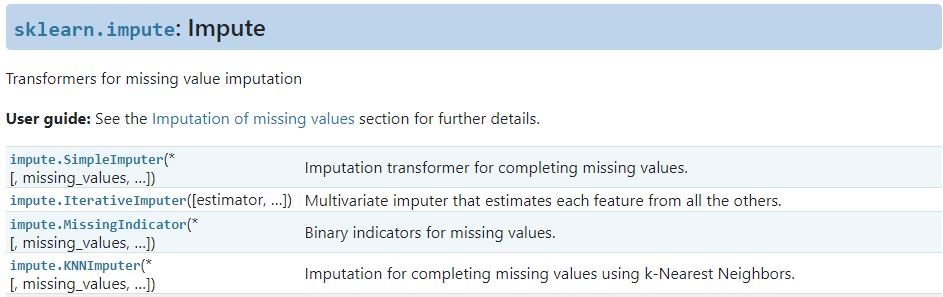

# Como lo acabo de mencionar voy a usar  el KnnImputer sin embargo como este es un modelo basado en distancia, antes de imputar necesito escalar.
# Dado lo anterior voy a hacer el escalado de datos y posteriormente voy a imputar.

# PARTE A - Escalado de datos

**Recordemos que:**

En los datasets solemos tener distintas variables, medidas en diferentes unidades y con distintas escalas. Por ejemplo, la altura de las personas adultas, medidas en metros, suele estar en el rango de las unidades —en general, menos que 2.5 metros—, mientras que su peso —medido en kilogramos— en el rango de las decenas o centenas. Si bien esto facilita su comprensión para los humanos, algunos modelos de Machine Learning pueden confundirse, ya que no saben de unidades.

Durante nuestras clases hemos visto que hay tres formas muy usadas de escalado de datos:

**- Escalado Mínimo-Máximo:** En general se usa cuando sabemos que nuestra variable puede tomar valores entre un mínimo y un máximo bien definidos. Por ejemplo, las notas de un examen de 0 a 10.

**- Estandarización de datos o escalado por Z-Score:**  También conocido como normalización —aunque en algunos ámbitos utilizan ese término para otro tipo de escalado— es probablemente la forma más utilizada. 

**- Escalados no-lineales:** Muchos modelos andan mejor cuando los atributos siguen distribuciones normales. Pero este muchas veces no es el caso. A veces las distribuciones no son simétricas, sino que tienen una cola, o, peor aún, siguen una ley de potencias. En esos casos, una transformación lineal como el Z-Score no servirá de mucho. Hay dos transformaciones que suelen ser útiles:
En el caso de una distribución que siga una ley de potencias, tomar el logaritmo de los valores transforma la distribución en algo muy parecido a una normal.
Si tomar logaritmo es muy drástico, ya sea porque la distribución tiene una cola pero no llega a ser una ley de potencias, tomar la raíz cuadrada suele ser un método efectivo.

**Entendamos en esta imagen la importancia de escalar.**

Tomado de:

https://ichi.pro/es/escalado-de-funciones-con-scikit-learn-para-ciencia-de-datos-154261215435519

Donde nos expresan que el propósito principal del escalado es reformular cada variable en una escala estandarizada y evitar inestabilidades numéricas potencialmente causadas por números demasiado grandes, para acelerar los algoritmos de optimización. Y el problema más importante sobre el escalado es asegurarse de aplicar el escalado tanto de los datos de entrenamiento como de los de prueba. Queremos escalar todos los datos a la misma escala.

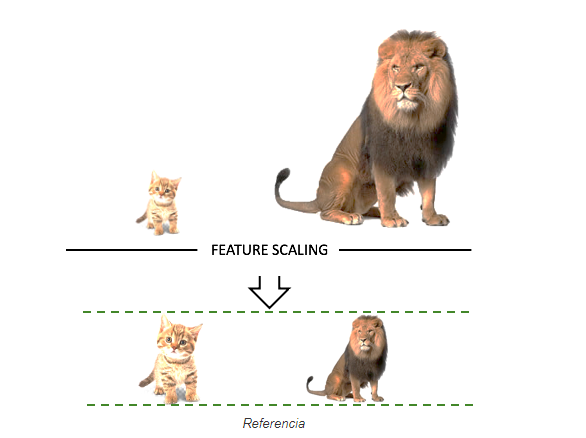

**Esta es la cantidad de datos con la que vamos a continuar trabajando:**

In [ ]:
dataPropiedades_04.shape

(71259, 8)

**Hagamos una copia del dataset con el que venimos trabajando:**

In [ ]:
dataPropiedades_05 = dataPropiedades_04.copy()

In [ ]:
dataPropiedades_05.columns

Index(['Barrios', 'Ambientes', 'Dormitorios', 'Baños', 'SuperficieTotal',
       'SuperficieCubierta', 'Precio', 'TipoPropiedad'],
      dtype='object')

**Los campos que voy a dejar son:**
- Barrios
- Ambientes
- Baños
- SuperficieCubierta
- SuperficieTotal
- Precio
- TipoPropiedad

In [ ]:
dataPropiedades_05.isnull().sum()

Barrios                 0
Ambientes               0
Dormitorios             0
Baños                   0
SuperficieTotal         0
SuperficieCubierta    428
Precio                  0
TipoPropiedad           0
dtype: int64

**Empecemos con el escalado de datos:**

In [ ]:
from sklearn import preprocessing

Es importante tener en cuenta que la información relacionada con la librería de sklearn para preprocesamiento es la siguiente, esta incluye escalado, normalización, métodos de binarización y centering.

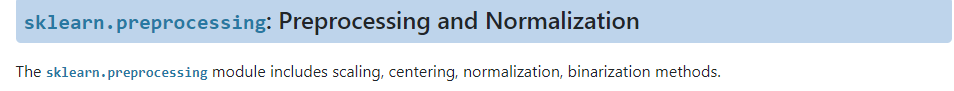

**Estaladores que nos presenta sklearn:**

- preprocessing.MinMaxScaler: Transform features by scaling each feature to a 
  given range.
- preprocessing.Normalizer: Normalize samples individually to unit norm.
- preprocessing.StandardScaler: Standardize features by removing the mean and 
  scaling to unit variance
- preprocessing.RobustScaler: Scale features using statistics that are robust 
  to outliers.

Las siguientes líneas de código que construí, las hice para analizar algunos escaladores y aunque luego de hablar con la profesora Valentina Grajales llegué a una conclusión que les presentaré más adelante, decidí no eliminarlas pues hace parte de mi aprendizaje y le puede servir a alguien más adelante..

**Voy a usar la función get_dummies de pandas, la cual es muy útil porque convierte variables categóricas en indicadores de variables dummies creando tantas nuevas columnas como cantidad de datos haya, será útil sobre todo para los barrios y los tipos de propiedades, veamos:**

Según las distintas conversaciones que tuvimos en el curso, considero que la longitud y la latitud son variables que no nos sirve para predecir, esta  información la puedo obtener de los barrios, así que opto por obviar latitud y longitud, pues son datos que podrían ser muy subjetivos, ya que ciertas latitudes y longitudes no son necesariamente indicativo de representar que las propiedades sean costosas, pues  hay propiedades cercanas y las separa por ejemplo un rio y a un lado del rio es más costosa y al otro lado menos, teniendo una longitud y latitud demasiado similar, algo que podría darnos más valor son los barrios de las propiedades,  quizá si tienen  bibliotecas, zonas de diversión, museos, lugares históricos.

Las latitudes van entre +180 y -180, a pesar de ser numérica tendríamos que codificarla para usarla en los modelos, habría que buscar la forma de codificarla para usarla en los modelos, de modo que signifique algo para el modelo.
Barrios y tipos de propiedad son bastante relevantes para este modelo.

In [ ]:
X = dataPropiedades_05.drop("Precio",axis=1)
y = dataPropiedades_05["Precio"]

In [ ]:
import sklearn.metrics 
import sklearn.metrics as metrics

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49881, 7)
(21378, 7)
(49881,)
(21378,)


**Como sabemos no se debe escalar teniendo en cuenta la variable predictora "y".**

**Los pasos a seguir son:** 


1. Se realiza split de los datos

2. Luego se hace un fit transform con X_train (Acá lo que se hace es optimizar el escalador), es decir uso la desviación estándar de X_train para escalar, lo que se está usando es el promedio y la desviación estándar de X_train para escalar todos los datos de X_train.

3. Luego hacer un transform solo con X_test (En este paso se está escalando X_test, pero no se está usando el promedio y la desvación estándar de X_test sino de X_train)

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
StandardScaler_01 = preprocessing.StandardScaler()
# fit.transform de X_train


In [ ]:
colums_numericas = ['Ambientes','Dormitorios','Baños', 'SuperficieCubierta','SuperficieTotal']

In [ ]:
X_train[colums_numericas] = StandardScaler_01.fit_transform(X_train[colums_numericas])
X_test[colums_numericas] = StandardScaler_01.fit_transform(X_test[colums_numericas])

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(49881, 7)
(21378, 7)
(49881,)
(21378,)


**Hasta acá escalé las variables numéricas**

**Ahora voy a escalar aquellas que son categóricas:**

Con la get_dummies de pandas, cuando se aplica a una columna de categorías producirá una nueva columna (variable) para cada valor categórico único. 

Colocará un uno en la columna correspondiente al valor categórico presente para esa observación. Esto es equivalente a **one hot encoding**

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(49881, 65)
(21378, 65)
(49881,)
(21378,)


**Hagamos un .head() para que observemos los datos:**

In [ ]:
X_train.head(1)

Ambientes  Dormitorios  ...  TipoPropiedad_Departamento  TipoPropiedad_PH
141079   1.342067     1.590453  ...                           1                 0

[1 rows x 65 columns]

In [ ]:
X_test.head(1)

Ambientes  Dormitorios  ...  TipoPropiedad_Departamento  TipoPropiedad_PH
52625  -0.745528    -0.986907  ...                           1                 0

[1 rows x 65 columns]

In [ ]:
dataPropiedades_04.isnull().any()

Barrios               False
Ambientes             False
Dormitorios           False
Baños                 False
SuperficieTotal       False
SuperficieCubierta     True
Precio                False
TipoPropiedad         False
dtype: bool

**Voy a hacer una copia del X_copia_test y el X_copia_train por si las llego a necesitar más adelante.**

In [ ]:
X_copia_test =X_test.copy()
X_copia_train = X_train.copy()

In [ ]:
# De la variable X
#X.head()


In [ ]:
# De la variable y
#y.head()

**Acá nos damos cuenta que en X_train tenemos 49881 filas por 65 columnas y en X_test tenemos 21378 filas por 65 columnas:**

In [ ]:
X_train.shape,X_test.shape

((49881, 65), (21378, 65))

**Como lo expresé cuando iba a analizar los escaladores, esta es mi gran conclusión, producto del aprendizaje y la investigación:** 

Al realizar el análisis exploratorio se logra observar y tener claridad sobre la distribución de los datos (es decir saber la desviación estándar).

El eliminar los valores atípicos, garantiza que no se tenga alta simetría, es decir que no se estire la curva de distribución de los datos, mis datos ahora tienen el comportamiento es parecido a una normal, pues la desviación estándar es pequeña.

Lo más aconsejable dado lo anterior es usar **standarscaler**

Este es un método de escalado basado en medias. 

La fórmula de StandardScaler es (Xi-Xmean) / Xstd, por lo que ajusta la media como 0.

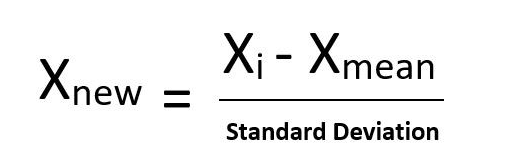

StandardScaler es vulnerable a valores atípicos porque los valores atípicos afectan la media. Si tiene una distribución normal o tiene datos casi normales, StandardScaler mueve sus datos más cerca de la distribución normal estándar. Es un hecho que StandardScaler no funcionará bien si tiene valores atípicos.

Tomado de:

https://ichi.pro/es/escalado-de-funciones-con-scikit-learn-para-ciencia-de-datos-154261215435519#:~:text=MinMaxScaler%20establece%20los%20datos%20de,es%20bueno%20manejar%20valores%20at%C3%ADpicos.






## Ahora si voy a empezar la imputación de datos.

# Parte A: Imputación basada en el uso de k-vecinos (impute.KNNImputer)

**Voy a realizar un Train/Test split de los datos con los que voy a trabajar**

In [ ]:
# Voy a elegir un 30% para pruebas y un 70% para entrenamiento.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
dataPropiedades_05.isnull().sum()


Barrios                 0
Ambientes               0
Dormitorios             0
Baños                   0
SuperficieTotal         0
SuperficieCubierta    428
Precio                  0
TipoPropiedad           0
dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)
y.shape

(49881, 65)
(21378, 65)


(71259,)

In [ ]:
X_copia_train_01 = X_train.copy()
X_copia_test_01 = X_test.copy()


In [ ]:
print(X_copia_train_01.shape)
print(X_copia_test_01.shape)


(49881, 65)
(21378, 65)


In [ ]:
#knn = KNNImputer(n_neighbors=1)
#neighbors = knn.fit_transform(data)
#KNN_imputer.fit(X_train)

X_copia_train_01 = X_train.copy()
X_copia_test_01 =X_test.copy()

#KNN_imputer.fit(X_test)

vecinos = [1,2,3,4,5,6,7,8,9]
for k in vecinos:
    KNN_imputer=KNNImputer(n_neighbors=k)
    
    KNN_imputer.fit(X_copia_train_01)
    X_knn_train= KNN_imputer.transform(X_copia_train_01)

    KNN_imputer.fit(X_copia_test_01)
    X_knn_test= KNN_imputer.transform(X_copia_test_01)

    tree = DecisionTreeRegressor(max_depth=8,random_state=42)
    tree.fit(X_knn_test,y_test)
    tree.fit(X_knn_train,y_train)
    y_pred_train = tree.predict(X_knn_train)
    y_pred_test = tree.predict(X_knn_test)

    
      # Calculemos el MAE
    MAE_train=mean_absolute_error(y_train,y_pred_train)

    # Calculemos el MSE
    MSE_train=mean_squared_error(y_train,y_pred_train)
  
    # Con el MSE calculado ya calculamos el RMSE
    RMSE_train=np.sqrt(MSE_train)

    r2_train= metrics.r2_score(y_train,y_pred_train)

    print("Tipo usado--->",k)
    print("MAE en train es:",MAE_train)
    print("RMSE en train es:",RMSE_train)
    print("r2 en train es:",r2_train)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

    # Calculemos el MAE
    MAE_test=mean_absolute_error(y_test,y_pred_test)

    # Calculemos el MSE
    MSE_test=mean_squared_error(y_test,y_pred_test)
  
    # Con el MSE calculado ya calculamos el RMSE
    RMSE_test=np.sqrt(MSE_test)

    r2_test= metrics.r2_score(y_test,y_pred_test)

    print("MAE en test es:",MAE_test)
    print("RMSE en test es:",RMSE_test)
    print("r2 en test es:",r2_test)
    


Tipo usado---> 1
MAE en train es: 40354.334812640875
RMSE en train es: 66150.114236073
r2 en train es: 0.7871868535752742
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MAE en test es: 41456.867904268605
RMSE en test es: 68077.98812158826
r2 en test es: 0.7627729516428005
Tipo usado---> 2
MAE en train es: 40249.28936163197
RMSE en train es: 65988.86207408794
r2 en train es: 0.7882231255183701
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MAE en test es: 41414.07877408186
RMSE en test es: 68065.72154055942
r2 en test es: 0.7628584330950665
Tipo usado---> 3
MAE en train es: 40352.66180679227
RMSE en train es: 66181.092276209
r2 en train es: 0.7869874864870526
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MAE en test es: 41617.338961879526
RMSE en test es: 68399.33101873305
r2 en test es: 0.760528139682673
Tipo usado---> 4
MAE en train es: 40344.60428184643
RMSE en train es: 66093.4523258576
r2 en train es: 0.787

**El mejor valor en test y train es 6, y con ese haré el imputer.**

In [ ]:
X_train.shape

(49881, 65)

In [ ]:
X_test.shape

(21378, 65)

In [ ]:
KNN_imputer=KNNImputer(n_neighbors=6,missing_values=np.nan,add_indicator=True)
KNN_imputer.fit(X_train)
KNN_imputer.fit(X_test)

X_knn_train = KNN_imputer.transform(X_train)
X_knn_test= KNN_imputer.transform(X_test)
    

In [ ]:
print(X_knn_train.shape)
print(X_knn_test.shape)
print(y_train.shape)
print(y_test.shape)


(49881, 66)
(21378, 66)
(49881,)
(21378,)


In [ ]:
np.isnan (X_knn_train).sum()

0

In [ ]:
np.isnan (X_knn_test).sum()

0

**Vamos a volver a ejecutar el mapa de calor sobre el dataset que hemos venido trabajando y del cual eliminamos los valores faltantes:**

# Parte A: Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Recordemos que en este sprint hemos aprendido que en la vida de un científico(a) de datos, uno de los objetivos principales es aumentar la eficiencia de nuestros modelos, esto puede significar disminuir los tiempos de procesamiento, mejorar los resultados que obtenemos, detectar cuáles son los atributos de nuestros datos que más nos importan, entre otras.

Para todos y cada uno de estos puntos nos sirve la reducción de dimensionalidad, es decir, buscar reducir la cantidad de features de un dataset, pero reteniendo la mayor cantidad de “información” posible.

Los modelos de reducción de dimensionalidad son parte del aprendizaje no supervisado dentro del universo de machine learning. 

Estos modelos nos pueden servir tanto para mejorar la eficiencia, como ya mencionamos, como también para tener un mejor entendimiento de nuestros datos. 

Vimos dos modelos de reducción de dimensionalidad: Singular Value Decomposition (SVD) y Principal Component Analysis (PCA).

**El X_test y el X_train que vengo trabajando hasta acá lo quiero dejar en copias, por si más adelante lo llego a necesitar.** 



In [ ]:
#X_copia_test =X_test.copy()
#X_copia_train = X_train.copy()

Como vimos en la bitácora 32 del sprint 2, PCA nos puede ayudar a preparar automaticamente los atributos, existen muchas implementaciones de PCA, acá usaré la de Scikit-Learn.

Recordemos que si tenemos una determinada cantidad de atributos, por ejemplo 15, lo que se hace es descubrir cómo se combinan o mezclan estos, para concluir que una cierta cantidad por ejemplo 5, son los nuevos atributos que representan de manera más significativa mis datos.

Con el siguiente "for" lo que haré será mirar la cantidad de componentes que más me hace sentido, 


In [ ]:
X_knn_train.shape

(49881, 66)

In [ ]:
X_knn_test.shape

(21378, 66)

**Voy a reducir dimensionalidad teniendo en cuenta un valor de 16 dimensiones:**

In [ ]:
pca_evaluado=PCA
componente=16
pca_evaluado=PCA(n_components=16,random_state=42)

X_train_con_pca=pca_evaluado.fit_transform(X_knn_train)
X_test_con_pca=pca_evaluado.fit_transform(X_knn_test)

tree = DecisionTreeRegressor(max_depth=10,random_state=42)

tree.fit(X_train_con_pca,y_train)
tree.fit(X_test_con_pca,y_test)

y_pred_train = tree.predict(X_train_con_pca)
y_pred_test = tree.predict(X_test_con_pca)

MAE_train=mean_absolute_error(y_train, y_pred_train)
MSE_train=mean_squared_error(y_train, y_pred_train)
RMSE_train=np.sqrt(MSE_train)
r2_train= metrics.r2_score(y_train, y_pred_train)


print("Datos de train:")    
print("# de Modelo:",componente)
print("El MAE para el modelo es:",MAE_train)
print("El RMSE para el modelo es:",RMSE_train)
print("El r2 para el modelo es:",r2_train)

MAE=mean_absolute_error(y_test, y_pred_test)
MSE=mean_squared_error(y_test, y_pred_test)
RMSE=np.sqrt(MSE)
r2= metrics.r2_score(y_test, y_pred_test)

print("Datos de test:")    
print("# de Modelo:",componente)
print("El MAE en test para el modelo es:",MAE)
print("El RMSE en test para el modelo es:",RMSE)
print("El r2 en test para el modelo es:",r2)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Datos de train:
# de Modelo: 16
El MAE para el modelo es: 48163.89084033303
El RMSE para el modelo es: 92150.14295472999
El r2 para el modelo es: 0.5870197504995951
Datos de test:
# de Modelo: 16
El MAE en test para el modelo es: 29316.45177282275
El RMSE en test para el modelo es: 47587.21220103365
El r2 en test para el modelo es: 0.8840872241428683
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
print(X_train_con_pca.shape)
print(X_test_con_pca.shape)
print(y_train.shape)
print(y_test.shape)


(49881, 16)
(21378, 16)
(49881,)
(21378,)


**Voy a ejecutar el shape de train y test para corroborar la cantidad de atributos:**

In [ ]:
X_train_con_pca.shape,X_test_con_pca.shape

((49881, 16), (21378, 16))

La varianza explicada acumulativa o CEV en inglés, para un componente principal es la razón entre la varianza de ese componente principal y la varianza total. 

Para varios componentes principales, se suman sus variaciones y se divide por la variación total.

A continuación una gráfica que da a conocer el VEA y PCA:

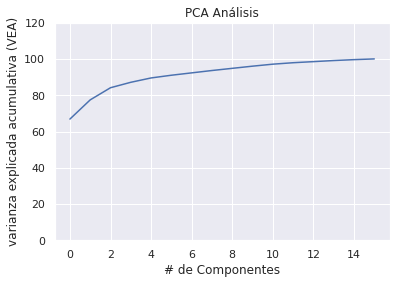

In [ ]:
covar_matrix = PCA(n_components = 16)
covar_matrix.fit(X_train_con_pca)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.title("Plot VEA para PCA")

plt.xlabel('# de Componentes')
plt.ylabel('varianza explicada acumulativa (VEA)');
plt.title('PCA Análisis')
plt.ylim(0,120)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

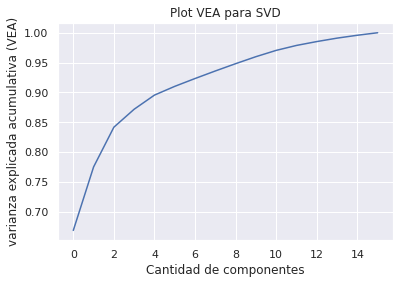

In [ ]:
svd = TruncatedSVD(15).fit(X_train_con_pca)
plt.plot(np.cumsum(covar_matrix.explained_variance_ratio_))

plt.title("Plot VEA para SVD")
plt.xlabel('Cantidad de componentes')
plt.ylabel('varianza explicada acumulativa (VEA)');

**Conclusiones:**
Hasta este momento utilicé algunas o varias de las siguientes técnicas para hacer pre-procesamiento de datos:

- Detección y eliminación de Outliers
- Eliminación o imputación de valores faltantes
- Escalado de datos
- Encoding
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA). 

In [ ]:
print('X_train: ', X_train.shape)
print('x_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train:  (49881, 65)
x_test: (21378, 65)
y_train: (49881,)
y_test: (21378,)


# **Estos son mis datos finales para el proyecto 2 y empezar a trabajar los modelos:**

Acá como podemos ver hemos hecho todo el pre-procesamiento y limpieza de datos, estamos listos para trabajar con los modelos.

In [ ]:
print('X_train_con_pca:', X_train_con_pca.shape)
print('X_test_con_pca:', X_test_con_pca.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train_con_pca: (49881, 16)
X_test_con_pca: (21378, 16)
y_train: (49881,)
y_test: (21378,)


# Luego de realizar toda la parte A:

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - con este nuevo dataset transformado. Evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Compara con el desempeño obtenido en el proyecto 01. Sea cual sea la respuesta, intenta explicar a qué se debe.

In [ ]:
dataFiltrada = data[((data["TipoPropiedad"] == "Departamento") | (data["TipoPropiedad"] == "Casa") | (data["TipoPropiedad"] == "PH")) & (data["Provincias"] == "Capital Federal")]
dataFiltrada = dataFiltrada[["Ambientes", "Dormitorios", "Baños", "SuperficieTotal", "SuperficieCubierta", "Precio"]]
dataFiltrada = dataFiltrada.dropna()
dataFiltrada.reset_index(inplace = True, drop = True)
dataFiltrada= dataFiltrada[(dataFiltrada["Precio"] <= 4000000) & (dataFiltrada["SuperficieTotal"] <= 1000) & (dataFiltrada["SuperficieTotal"] >= 15)]
dataFiltrada.head()


Ambientes  Dormitorios  Baños  SuperficieTotal  SuperficieCubierta    Precio
0        7.0          7.0    2.0            140.0               140.0  153000.0
1        2.0          1.0    2.0             70.0                58.0  159000.0
2        2.0          1.0    1.0             45.0                45.0  125000.0
3        2.0          1.0    1.0             85.0                50.0  295000.0
4        2.0          1.0    1.0             56.0                56.0  150000.0

In [ ]:
dataFiltrada.shape

(81019, 6)

**Verifiquemos si hay valores nulos:**

In [ ]:
count2=dataFiltrada["Baños"].isnull().sum()
print('Cantidad Baños null:', count2);

count3=dataFiltrada["Ambientes"].isnull().sum()
print('Cantidad Ambientes null:',count3);

count4=dataFiltrada["SuperficieCubierta"].isnull().sum()
print('Cantidad SuperficieCubierta null:',count4);

count5=dataFiltrada["SuperficieTotal"].isnull().sum()
print('Cantidad SuperficieTotal null:', count5);

count6=dataFiltrada["Dormitorios"].isnull().sum()
print('Cantidad Dormitorios null:', count6);

count7=dataFiltrada["Precio"].isnull().sum()
print('Cantidad de valores Precio null:', count7);


Cantidad Baños null: 0
Cantidad Ambientes null: 0
Cantidad SuperficieCubierta null: 0
Cantidad SuperficieTotal null: 0
Cantidad Dormitorios null: 0
Cantidad de valores Precio null: 0


**Creemos las variables predictoras y la variable a predecir:**

In [ ]:
# En x: "Ambientes","SuperficieCubierta","SuperficieTotal","Dormitorios","Baños"
# en y: Precio
#X = dataFiltrada[["Ambientes","SuperficieCubierta","SuperficieTotal","Dormitorios","Baños"]]
XX = dataFiltrada[["Ambientes","SuperficieCubierta","SuperficieTotal","Dormitorios","Baños"]]
yy = dataFiltrada["Precio"]

**Realizo test - split de los datos:**

In [ ]:
# Voy a elegir un 30% para pruebas y un 70% para entrenamiento.
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state=42)


**En su momento definí un árbol de regresión con profundidad 3 y posteriormente lo optimicé:**

In [ ]:
arbol_regresion = DecisionTreeRegressor(random_state=42, max_depth=3)

In [ ]:
arbol_regresion.fit(XX_train,yy_train)
print('Parámetros por defecto de arbol de regresión:\n', arbol_regresion.fit(XX_train,yy_train))


Parámetros por defecto de arbol de regresión:
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')


**Métricas para el árbol de regresión**

**Las siguientes instrucciones son para definir los valores en "y" para la predicción y para el entrenamiento para ambos modelos:**

In [ ]:
yy_arbol_pred_train = arbol_regresion.predict(XX_train)
yy_arbol_pred_test = arbol_regresion.predict(XX_test)


In [ ]:
# Calculemos el MAE
arbol_MAE_train=mean_absolute_error(yy_train,yy_arbol_pred_train)
arbol_MAE_test=mean_absolute_error(yy_test,yy_arbol_pred_test)

# Calculemos el MSE
arbol_MSE_train=mean_squared_error(yy_train,yy_arbol_pred_train)
arbol_MSE_test=mean_squared_error(yy_test,yy_arbol_pred_test)

# Con el MSE calculemos el RMSE
arbol_RMSE_train=np.sqrt(arbol_MSE_train)
arbol_RMSE_test=np.sqrt(arbol_MSE_test)

# Calculemos el r2
arbol_r2_train= metrics.r2_score(yy_train, yy_arbol_pred_train)
arbol_r2_test= metrics.r2_score(yy_test, yy_arbol_pred_test)

# Calculemos el r2 ajustado
arbol_adj_r2_train = 1 - ((1 - arbol_r2_train) * (len(y_train) - 1)) / (len(y_train) - X_train.shape[1] - 1)
arbol_adj_r2_test = 1 - ((1 - arbol_r2_test) * (len(y_test) - 1)) / (len(y_test) - X_test.shape[1] - 1)
    

print("El MAE en train para el arbol de regresión es:",arbol_MAE_train)
print("El MAE en test para el arbol de regresión es:",arbol_MAE_test)
print("__________________________________________________________________________")
print("El RMSE en train para el arbol de regresión es:",arbol_RMSE_train)
print("El RMSE en test para el arbol de regresión es:",arbol_RMSE_test)
print("__________________________________________________________________________")
print("El r2 de train para el arbol de regresión es:",arbol_r2_train)
print("El r2 de test para el arbol de regresión es:",arbol_r2_test)
print("__________________________________________________________________________")
print("El r2 ajustado de train para el arbol de regresión es:",arbol_adj_r2_train)
print("El r2 ajustado de test para el arbol de regresión es:",arbol_adj_r2_test)

El MAE en train para el arbol de regresión es: 91548.36407240885
El MAE en test para el arbol de regresión es: 92426.86608549287
__________________________________________________________________________
El RMSE en train para el arbol de regresión es: 191783.485243933
El RMSE en test para el arbol de regresión es: 194688.15091192327
__________________________________________________________________________
El r2 de train para el arbol de regresión es: 0.5844333913686437
El r2 de test para el arbol de regresión es: 0.5852162030595955
__________________________________________________________________________
El r2 ajustado de train para el arbol de regresión es: 0.5838911484787302
El r2 ajustado de test para el arbol de regresión es: 0.583951143618852


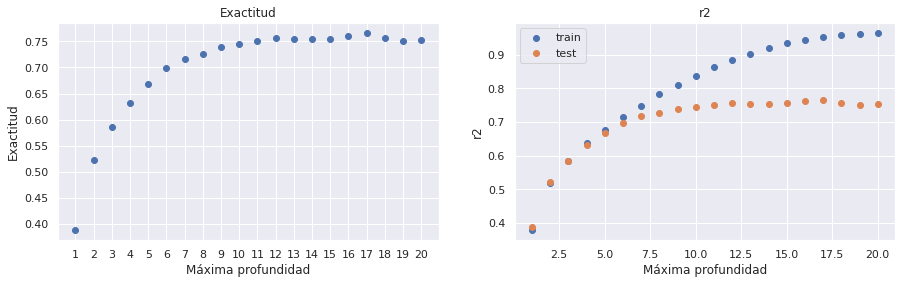

In [ ]:
rango_maxima_profundidad = range(1, 21)
scores = []
arbol_r2_train_pred=[]
arbol_r2_test_pred=[]

for k in rango_maxima_profundidad:
    arbol_regresion = DecisionTreeRegressor(max_depth=k,random_state=42)
    arbol_regresion.fit(XX_train, yy_train)
    scores.append(arbol_regresion.score(XX_test, yy_test))
    
    yy_train_pred = arbol_regresion.predict(XX_train)
    arbol_r2_train = metrics.r2_score(yy_train, yy_train_pred)
    arbol_r2_train_pred.append(arbol_r2_train)
    
    yy_test_pred = arbol_regresion.predict(XX_test)
    arbol_r2_test = metrics.r2_score(yy_test, yy_test_pred)
    arbol_r2_test_pred.append(arbol_r2_test)
    

fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.scatter(rango_maxima_profundidad,scores,marker="o")
ax2.scatter(rango_maxima_profundidad,arbol_r2_train_pred,marker="o",label="train")
ax2.scatter(rango_maxima_profundidad,arbol_r2_test_pred,marker="o",label="test")

ax1.set_xticks(rango_maxima_profundidad)

ax2.legend()


ax1.set_title('Exactitud')
ax1.set_xlabel('Máxima profundidad')
ax1.set_ylabel('Exactitud')

ax2.set_title('r2')
ax2.set_xlabel('Máxima profundidad')
ax2.set_ylabel('r2')

plt.show()


 **Con lo observado el mejor valor de profundidad está entre 16**
 
 Voy a ejecutar el árbol de regresión con los parámetros optimizados:

In [ ]:
# Con lo observado el mejor valor de profundidad está entre 14 a 16
arbol_optimo_p1 = DecisionTreeRegressor(max_depth= 16,random_state=42) 
arbol_optimo_p1.fit(XX_train,yy_train)
print(arbol_optimo_p1.fit(XX_train,yy_train))


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')


R2 en Train: 0.9444863840560823
______________________________________________________________
R2 en test: 0.7609628953531585
______________________________________________________________
RMSE en train: 70095.58150028698
RMSE en test: 147795.5264469302


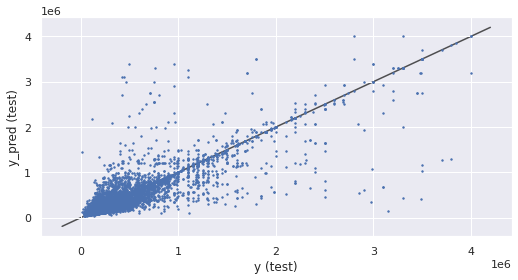

In [ ]:
modelos = ['Árbol de Decisión']

yy_train_pred = arbol_optimo_p1.predict(XX_train)
yy_test_pred = arbol_optimo_p1.predict(XX_test)

r2_train= metrics.r2_score(yy_train,yy_train_pred)
r2_test= metrics.r2_score(yy_test,yy_test_pred)
    
RMSE_train=np.sqrt(mean_squared_error(yy_train,yy_train_pred))
RMSE_test=np.sqrt(mean_squared_error(yy_test,yy_test_pred))

print("R2 en Train:", r2_train)
print("______________________________________________________________")
print("R2 en test:", r2_test)
print("______________________________________________________________")
print("RMSE en train:",RMSE_train)
print("RMSE en test:",RMSE_test)

plt.figure(figsize = (14,4))

ax = plt.subplot(1,2,2)
ax.scatter(yy_test,yy_test_pred, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**El Modelo Árbol de Decisión con datos del proyecto uno con profundidad=16 tuvo el siguiente comportamiento:**

- R2 en Train: 0.9444863840560823

- R2 en test: 0.7609628953531585

- RMSE en train: 70095.58150028698

- RMSE en test: 147795.5264469302

**Me gustaría ejecutar para este Benchmark o modelo del proyecto 1, verificar la importancia de las variables, veamos:**

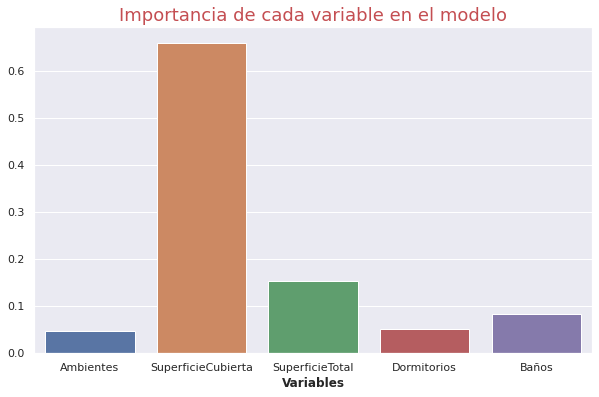

In [ ]:
importances = arbol_optimo_p1.feature_importances_
columns = XX_train.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

**En este modelo la variable más importante es la superficie cubierta, seguida por la Superficie Total, posteriormente por Baños, y en menor medida Dormitorios y Ambientes.**

**Recordemos los datos que optimicé en este proyecto 2:**

In [ ]:
print('X_train_con_pca:', X_train_con_pca.shape)
print('X_test_con_pca:', X_test_con_pca.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train_con_pca: (49881, 16)
X_test_con_pca: (21378, 16)
y_train: (49881,)
y_test: (21378,)


# **Mi arbol del proyecto 1 entrenado con datos pre-procesados en el proyecto 2:**

In [ ]:
arbol_optimo_p1.fit(X_train_con_pca,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=16,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

**En la siguiente instrucción voy a mostrar sus métricas:**

r2 en Train: 0.9482235822828026
r2 en test: -0.48804769088681343
***************************************
RMSE en train: 32628.51975840511
RMSE en test: 170503.39669841612


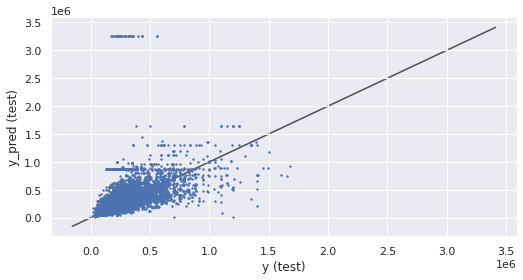

In [ ]:
y_train_pred = arbol_optimo_p1.predict(X_train_con_pca)
y_test_pred = arbol_optimo_p1.predict(X_test_con_pca)

r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))

print("r2 en Train:", r2_train)
print("r2 en test:", r2_test)
print("***************************************")
print("RMSE en train:",RMSE_train)
print("RMSE en test:",RMSE_test)

plt.figure(figsize = (14,4))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

**Veamos el mismo gráfico anterior pero agregángole el de errores:**

Raíz del error cuadrático medio en Train: 32628.51975840511
Raíz del error cuadrático medio en Test: 170503.39669841612


(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 <a list of 10 Text major ticklabel objects>)

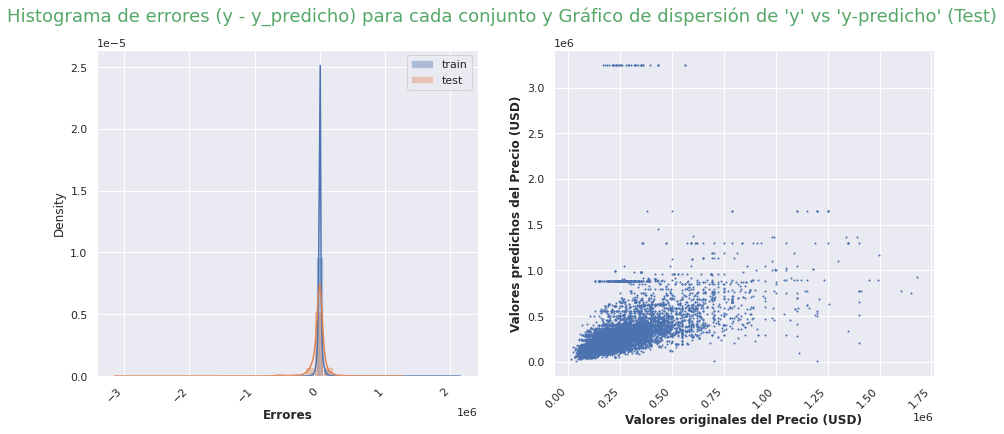

In [ ]:
arbol_optimo_p1.fit(X_train_con_pca, y_train)
y_train_pred = arbol_optimo_p1.predict(X_train_con_pca)
y_test_pred = arbol_optimo_p1.predict(X_test_con_pca)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (15,6))
plt.suptitle("Histograma de errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "g")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45, horizontalalignment="right")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45, horizontalalignment="right")

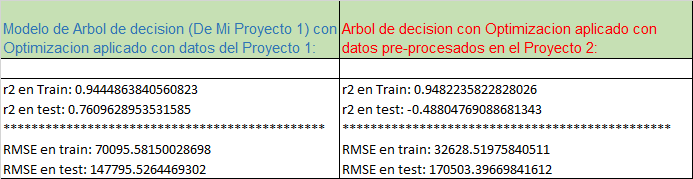

**Conclusión:**

Al observar los datos da la tabla anterior,concluyo que el arbol del proyecto 1 con la optimización aplicada con datos del proyecto 2, no tiene un desempeño significativo con respecto al modelo del proyecto 1 sin optimización, esto se puede observar tanto en el en train como en el test. 

Aunque en el proyecto 2 el train es similar al del proyecto 1, en cuanto a test, es muy inferior.

Igual el RMSE en train del proyecto 2 es mejor que el del proyecto 1, y el RMSE en test es mayor al RMSE del test en el proyecto 1.

Se me ocurren varias razones para que el proyecto 1 haya presentado unos resultados aparentemente mejores:

- Quizá en el proyecto 1 había sobre ajuste causado entre otras razones por el parámetro profundidad del arbol.
- Hubo variables como por ejemplo tipo de propiedad a las que no se les aplicó encoding causando que el modelo tomara decisiones que pudieron no ser acertadas.
- No se realizó escalamiento puesto que ciertos datos de algunos atributos pudieron ser interpretados por el modelo de manera no comprensible.
- No se eliminaron outliers lo que influye también fuertemente en que el modelo tuviera un desempeño que no es fácil de predecir.

Mi desconocimiento pudo llevar a usar variables que sin un adecuado uso hacen que los modelos se comporten de formas impredecibles.
Para mi la principal razón tiene que ver por supuesto con el pre-procesamiento realizado a los datos, pues así el modelo comprende más fácil lo que se le presenta.

**Recordemos lo siguiente:**

- El resultado de un proyecto de ciencia de datos depende en gran medida de la calidad de los datos, de la calidad del análisis exploratorio de los datos y de qué también realicemos el pre-procesamiento que realicemos.
- Modelos muy poderosos podrían no dar buenos resultados si estamos trabajando con datos malos.
- Si tengo un número de muestra suficientemente significativo, cualquier modelo me serviría.

- Son muchas las razones por omisión o no de parámetros, datos y demás que pudieron hacer que el modelo fuera excelente bajo ciertas condiciones o quizá que con datos de entrenamiento pudiera ser excelente pero a la hora de probarlo con datos que no ha visto, como lo vimos en este sprint 2, no fuera tan bueno.

Por otro lado el arbol del proyecto 2 con optimización aplicada con datos del proyecto 2, aunque presenta valores en train y test inferiores, no son para nada despreciables, teniendo un muy buen comportamiento en train y en test en todos las métricas evaluadas, y sabiendo que ya hay un mejor tratamiento de los datos.

*Personalmente me gusta lo obtenido tanto en el proyecto 1 como en el 2 con los datos optimizados del proyecto 2, se me hacen más veraces y confío bastante en ellos, dado todo lo que he hecho en esta primera parte del sprint 2 para:*

- Detectar	y eliminar  Outliers, 
- Hacer Encoding, 
- Imputación de valores faltantes 
- Escalado de datos.
- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Las razones anteriores explicadas, me llevan a tomar una decisión y es que el modelo de Arbol de decision (Del Proyecto 2) con Optimizacion aplicado con datos del Proyecto 2 podría ser mi Bechmark, confío más en este árbol.



**Para efectos posteriores de mostrar resultados guardaré los valores de estos modelos en variables:**

In [ ]:
rmse_train_benchmark_Modelo1 = int(70095)
rmse_test_benchmark_Modelo1 = int(147795)

rmse_train_benchmark_Modelo2 = int(32628)
rmse_test_benchmark_Modelo2 = int(170503)


In [ ]:
print('X_train_con_pca:', X_train_con_pca.shape)
print('X_test_con_pca:', X_test_con_pca.shape)
print('y_train:', y_train.shape)
print('y_test:',y_test.shape)

X_train_con_pca: (49881, 16)
X_test_con_pca: (21378, 16)
y_train: (49881,)
y_test: (21378,)


# PARTE B - Modelos Avanzados

- Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización).

- Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

**En este sprint 2, hice un pre - procesamiento con mucha conciencia y generé nuevos predictores, mi idea es empoderar esa regresión lineal y generar atributos polinómicos.**

Entonces usaré ***XGBoost*** y ***Baggingregressor***

Los algoritmos de aprendizaje automático que usan estos dos modelos tienen algo en común y es que son algoritmos que se denominan ensamblados.

***¿En qué consisten los algoritmos ensamblados?*** De manera sencilla podría decirse que son algoritmos formados por algoritmos más simples. Estos algoritmos simples se unen para formar un algoritmo más potente. Como bien dicen «La unión hace la fuerza«, y lo demuestran los algoritmos ensamblados.

Aunque hay diversas formas de ensamblar o unir algoritmos débiles para formar otros, **las más usadas y populares son el bagging y el boosting**

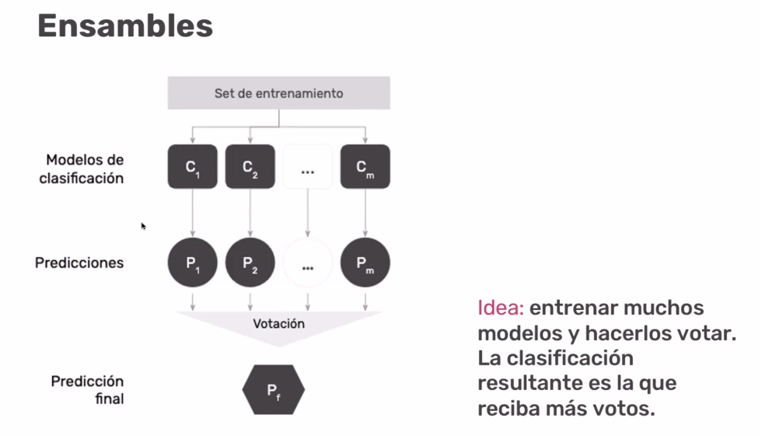

**Algoritmos de bagging o bootstrap Aggregation:**
Aunque de primera esta clase de algoritmo no suene tanto, a lo mejor suena más el algoritmo Random Forest. Este algoritmo es un ejemplo de uso de bagging que combina árboles de decisión para formar el Random Forest.

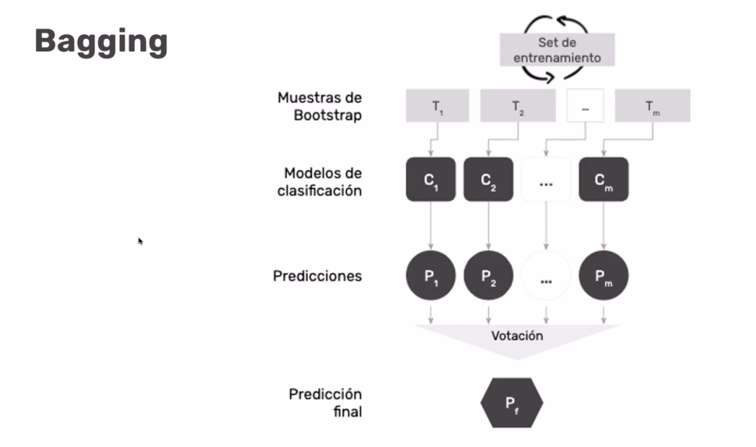

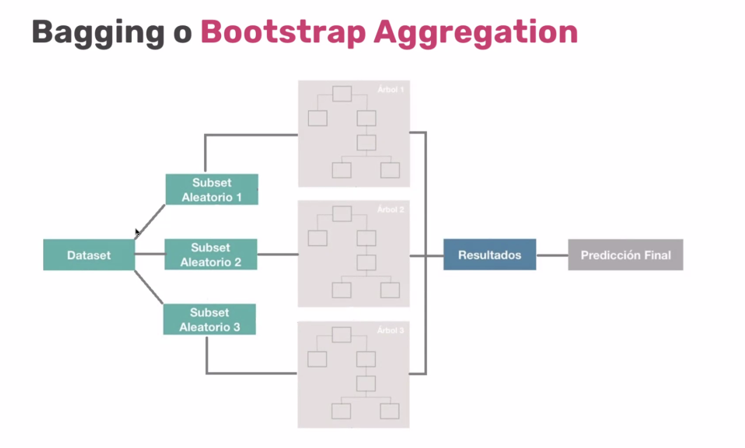

**«El principal objetivo intrínseco de los algoritmos de bagging es el de la reducción de la varianza»**

Los métodos de bagging son métodos donde los algoritmos simples son usados en paralelo. El principal objetivo de los métodos en paralelo es el de aprovecharse de la independencia que hay entre los algoritmos simples, ya que el error se puede reducir bastante al promediar las salidas de los modelos simples. Es como si, queriendo resolver un problema entre varias personas independientes unas de otras,  damos por bueno lo que eligiese la mayoría de las personas.

**Booting:** Esta técnica de ensamble trabaja iterativamente aumentando el peso de las instancias mal clasificadas previamente. 
En este Se le da más importancia a los datos con los que se equivocó y se cambian los atributos para cada árbol.

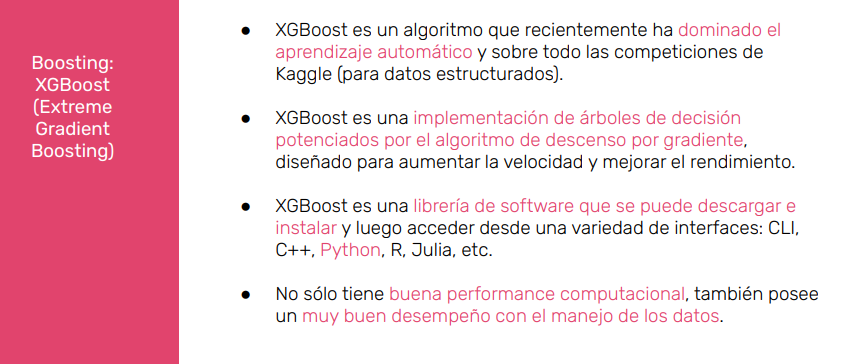

Antes de empezar, dejando un poco la teoria me gustaría mostrar las diferencias entre los dos modelos que voy a usar:

image.png

Mi intención es optimizar sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search, donde la idea es entregar el modelo y me serán devueltos los parámetros  con el mejor desempeño, el promedio, la desviación estándar, entre otros.

**Empecemos a trabajar.**


# XGBoost Regressor

**Empecemos a trabajar:**

In [ ]:
# APLICAMOS LOS VALORES DE LOS HIPERPARAMETROS Y VOLVEMOS A CORRER EL MODELO:
xgb_model_2 = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=250,
                             seed=0)

eval_set = [(X_train_con_pca, y_train), (X_test_con_pca, y_test)]

xgb_model_2.fit(X_train_con_pca, y_train, eval_metric=["rmse"], eval_set=eval_set, early_stopping_rounds = 10,verbose=True)

results = xgb_model_2.evals_result()

predictions = xgb_model_2.predict(X_test_con_pca)

[0]	validation_0-rmse:229121	validation_1-rmse:226174
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:210140	validation_1-rmse:207378
[2]	validation_0-rmse:193244	validation_1-rmse:190504
[3]	validation_0-rmse:178338	validation_1-rmse:175836
[4]	validation_0-rmse:165055	validation_1-rmse:162420
[5]	validation_0-rmse:153467	validation_1-rmse:150886
[6]	validation_0-rmse:143238	validation_1-rmse:140548
[7]	validation_0-rmse:134265	validation_1-rmse:131676
[8]	validation_0-rmse:126522	validation_1-rmse:124156
[9]	validation_0-rmse:119752	validation_1-rmse:117773
[10]	validation_0-rmse:113694	validation_1-rmse:111788
[11]	validation_0-rmse:108656	validation_1-rmse:107033
[12]	validation_0-rmse:104174	validation_1-rmse:102559
[13]	validation_0-rmse:99941.9	validation_1-rmse:98438.6
[14]	validation_0-rmse:96607.2	validation_1-rmse:95301.9
[15]	validation_0-rmse

In [ ]:
xgb_model_2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=0, silent=None, subsample=1, verbosity=1)

# Con lo anterior voy a elegir los mejores parámetros para poder entrenar el XGBoost:

In [ ]:
param_grid= {
    'max_depth':[5,6],
    'learning_rate':[0.2, 0.25],
    'gamma': [0],
    'reg_lambda':[1,2]}

In [ ]:
# Genero un XGboost con valores por defecto para verificar sus hiper parámetros por defecto
xgbr = xgb.XGBRegressor(verbosity=0, n_estimators=250, objective='reg:squarederror')
# Imprimo los valores
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=0)


Al modelo le voy a entregar los parámetros y los folds (CV), lo normal es que el número de folds para la cantidad de datos que tenemos, y con el análisis hecho con nuestra profesora de este sprint, un valor adecuado es **"5"**
La optimización de los hiperparámetros la voy a hacer con GridSearchCV.

In [ ]:
model_xgb = GridSearchCV(xgbr,param_grid=param_grid, cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1,)


**Entreno el modelo con los datos de entrenamiento:**

# Este proceso tarda en mi máquina aproximadamente unos 7 minutos en realizarse:

In [ ]:
model_xgb.fit(X_train_con_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=250, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0], 'learning_rate': [0.2, 0.25],
                         'max_depth': [5, 6], 'reg_lambda':

fit_parm= {
    'early_stopping_rounds':10,
    'eval_metrics':'mse',
    'eval_set':([X_test,y_test])
}

**Imprimo cuáles son los mejores parámetros y el mejor score:**

In [ ]:
score_xgboost_train = model_xgb.best_score_
print("Mejores parametros en train: "+str(model_xgb.best_params_))
print("Mejor Score en train: "+str(model_xgb.best_score_)+'\n')
scores = pd.DataFrame(model_xgb.cv_results_)
scores

Mejores parametros en train: {'gamma': 0, 'learning_rate': 0.25, 'max_depth': 6, 'reg_lambda': 1}
Mejor Score en train: -55908.03048782528



mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0      28.551582      0.240588  ...     5294.852478                6
1      28.507219      0.099060  ...     5340.472624                8
2      34.784629      0.253483  ...     5395.866812                3
3      34.686820      0.131300  ...     5523.996077                2
4      28.454683      0.084871  ...     5202.558230                7
5      28.353465      0.095566  ...     5207.753571                5
6      34.373395      0.169385  ...     5497.119069                1
7      34.240696      0.115004  ...     5428.555476                4

[8 rows x 17 columns]

**En la siguiente instrucción lo ejecuto para test, para poder tener el score en test:**

In [ ]:
model_xgb.fit(X_test_con_pca, y_test)
score_xgboost_test = model_xgb.best_score_
print("Mejores parametros en test: "+str(model_xgb.best_params_))
print("Mejor Score en test: "+str(model_xgb.best_score_)+'\n')

Mejores parametros en test: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'reg_lambda': 2}
Mejor Score en test: -58568.59929815405



Text(0.5, 0, 'Número de árboles')

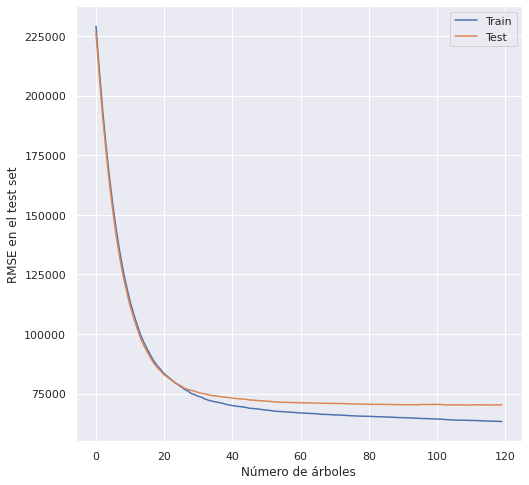

In [ ]:
# Realizo la gráfica donde muestro el Root Mean Squared error en el set de prueba y vemos como 
#evoluciona con la cantidad de árboles utilizados para la prediccion:

epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.legend()
plt.ylabel('RMSE en el test set')
plt.xlabel('Número de árboles')

# **Conclusión para el XGBoost:**

- Mejores parametros en train: {'gamma': 0, 'learning_rate': 0.25, 'max_depth': 6, 'reg_lambda': 1}

- Mejor Score en train: -55908.03048782528


- Mejores parametros en test: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'reg_lambda': 2}

- Mejor Score en test: -58568.59929815405

De acuerdo a la curva se puede deducir que aproximadamente los 20 primeros árboles son los que más contribuyen a los resultados, es decir en estos valores se hizo el aporte más significativo de los árboles al modelo.

Igual de 80 árboles hacia adelante las curvas se paralelizan y el comportamiento en test y train se hacen muy similares y ya posiblemente no tiende a mejorar.

# Bagging Regressor:

**Dado que el otro modelo elegido BaggingRegressor voy a empezar a trabajar con el mismo:**

Los siguientes parámetros los voy a tomar dadas algunas investigaciones y validaciones que hice:

In [ ]:
bagging_regressor = BaggingRegressor(random_state=42)
params_bagging={
    "n_estimators":[10],
    "bootstrap":[True],
    "warm_start":[True],   
}

In [ ]:
modelo_bagging = GridSearchCV(bagging_regressor,param_grid=params_bagging, cv=5,n_jobs=-1, scoring='neg_root_mean_squared_error')
modelo_bagging.fit(X_train_con_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True], 'n_estimators': [10],
                         'warm_start': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
score_bagging_train = modelo_bagging.best_score_
print("Veamos los mejores parametros en train: "+str(modelo_bagging.best_params_))
print("Veamos el mejor score en train: "+str(modelo_bagging.best_score_))

Veamos los mejores parametros en train: {'bootstrap': True, 'n_estimators': 10, 'warm_start': True}
Veamos el mejor score en train: -56805.67540762469


In [ ]:
scores = pd.DataFrame(modelo_bagging.cv_results_)
scores.sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       8.036767      1.204051  ...     5311.497993                1

[1 rows x 16 columns]

In [ ]:
modelo_bagging.fit(X_test_con_pca,y_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True], 'n_estimators': [10],
                         'warm_start': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [ ]:
score_bagging_test = modelo_bagging.best_score_
print("Veamos los mejores parametros en test: "+str(modelo_bagging.best_params_))
print("Veamos el mejor score en test: "+str(modelo_bagging.best_score_))

Veamos los mejores parametros en test: {'bootstrap': True, 'n_estimators': 10, 'warm_start': True}
Veamos el mejor score en test: -60148.00161621293


# **Conclusión Bagging Regressor:**

- Veamos los mejores parametros en train: {'bootstrap': True, 'n_estimators': 10, 'warm_start': True}

- Veamos el mejor score en train: -56805.67540762469

- Veamos los mejores parametros en test: {'bootstrap': True, 'n_estimators': 10, 'warm_start': True}
- Veamos el mejor score en test: -60148.00161621293

Podemos observa que nuestro modelo tienen un muy buen comportamiento tanto en el train como en el test, con mejor resultado en train que en test.

In [ ]:
rmse_train_benchmark_Modelo1 = int(70095)
rmse_test_benchmark_Modelo1 = int(147795)

rmse_train_benchmark_Modelo2 = int(32628)
rmse_test_benchmark_Modelo2 = int(170503)

**Observemos los resultados en el train para los cuatro modelos que estamos comparando:**

In [ ]:
model_performances_3=pd.DataFrame({'Modelo':['Benchmark_Modelo1','Benchmark_Modelo2', 'model_xgb', 'modelo_bagging'],
                                 'Train_RMSE':[rmse_train_benchmark_Modelo1,rmse_train_benchmark_Modelo2, abs(score_xgboost_train),abs(score_bagging_train)]})


model_performances_3.sort_values(by = "Train_RMSE",ascending=True)

Modelo    Train_RMSE
1  Benchmark_Modelo2  32628.000000
2          model_xgb  55908.030488
3     modelo_bagging  56805.675408
0  Benchmark_Modelo1  70095.000000

**Observemos los resultados en el test para los cuatro modelos que estamos 
comparando:**

In [ ]:
model_performances_4=pd.DataFrame({'Modelo':['Benchmark_Modelo1','Benchmark_Modelo2', 'model_xgb', 'modelo_bagging'],
                                 'Test_RMSE':[rmse_test_benchmark_Modelo1,rmse_test_benchmark_Modelo2, abs(score_xgboost_test),abs(score_bagging_test)]})


model_performances_4.sort_values(by = "Test_RMSE",ascending=True)

Modelo      Test_RMSE
2          model_xgb   58568.599298
3     modelo_bagging   60148.001616
0  Benchmark_Modelo1  147795.000000
1  Benchmark_Modelo2  170503.000000

**Conclusiones:**

De acuerdo a lo observado anteriormente en **train** tuvo mejor desempeño el modelo del arbol de regresión  1 entrenado con datos pre-perocesados del proyecto 2, seguido del XGBoost, luego el modelo bagging y por último el modelo 1 entrenado con datos del modelo 1.

Ahora en **test** es extraordinario ver que el mejor modelo es el XGBoost, seguido del Bagging, posteriormente el modelo 1 entrenado con datos del modelo 1 y por último el modelo 1 entrenado con datos del modelo 2.

**Como conclusión fundamental vemos que si vale la pena hacer un excelente pre-procesado y limpieza de datos y si lo unimos con el poder usar unos excelentes modelos como lo son el XGBoost y el Bagging Regressor, me parecieron un excelentes resultados después de tanto esfuerzo hasta acá llevado.**

**De acuerdo a estos resultados mi mejor modelo es el XGBoost, porque tuvo unos excelentes resultados en train y en test, asi doy por finalizada esta parte B del trabajo.**


**Para mi fue un acierto elegir  métodos de ensemble para mi análisos, pues tal como mencioné antes, estos combinan múltiples modelos en uno nuevo con el objetivo de lograr un equilibro entre sesgo y varianza, consiguiendo así mejores predicciones que cualquiera de los modelos individuales originales. 

Los dos tipos de ensemble más utilizados y que por ellos también los elegí son:**

**Bagging:** Se ajustan múltiples modelos, cada uno con un subconjunto distinto de los datos de entrenamiento. Para predecir, todos los modelos que forman el agregado participan aportando su predicción. Como valor final, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables categóricas). 

**Boosting:** Se ajustan secuencialmente múltiples modelos sencillos, llamados weak learners, de forma que cada modelo aprende de los errores del anterior. Como valor final, al igual que en bagging, se toma la media de todas las predicciones (variables continuas) o la clase más frecuente (variables cualitativas). 

# PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

**Cómo voy a abordar este punto:**

Según lo explicado por la profesora lo que debemos hacer en este punto es elegir uno de los bosques vistos en clase, ejecutarlo y posteriormente tomar uno de esos árboles y con base en las métricas responder las preguntas acá planteadas:**

Entonces primero voy a declarar un bosque, en este caso el random forest.

Una vez haya hecho lo anterior, elijo uno o varios árboles, es decir un árbol de los del bosque.

Y realizo conclusiones.


Voy a usar el siguiente set de datos, porque se que ya están filtrados y sin nulos.

In [ ]:
# Voy a elegir un 30% para pruebas y un 70% para entrenamiento.
XX = dataFiltrada[["Ambientes","SuperficieCubierta","SuperficieTotal","Dormitorios","Baños"]]
yy = dataFiltrada["Precio"]
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state=42)

In [ ]:
randomforest_analizado = RandomForestRegressor(random_state=42,bootstrap=False, criterion= "mse", max_depth= None, max_features= "sqrt", n_estimators= 100)
randomforest_analizado.fit(XX_train,yy_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

**Veamos las métricas para el random forest:**

In [ ]:
y_train_pred_RForest = randomforest_analizado.predict(XX_train)
y_test_pred_RForest = randomforest_analizado.predict(XX_test)

rmse_train_RForest = np.sqrt(mean_squared_error(yy_train, y_train_pred_RForest))
rmse_test_RForest = np.sqrt(mean_squared_error(yy_test, y_test_pred_RForest))

r2_train= metrics.r2_score(yy_train, y_train_pred_RForest)
r2_test= metrics.r2_score(yy_test, y_test_pred_RForest)

print("RMSE en Train es:",rmse_train_RForest)
print("RMSE en Test es:",rmse_test_RForest)

print("r2 en Train es:",r2_train)
print("r2 en Test es:",r2_test)


RMSE en Train es: 52460.938480967736
RMSE en Test es: 125084.42215348568
r2 en Train es: 0.9689050157168049
r2 en Test es: 0.8287820884639328


In [ ]:
random_forest_rmse_train_sin_GridSearch = abs(int(rmse_train_RForest))
print(random_forest_rmse_train_sin_GridSearch)

random_forest_rmse_test_sin_GridSearch = abs(int(rmse_test_RForest))
print(random_forest_rmse_test_sin_GridSearch)

52460
125084


In [ ]:
len(randomforest_analizado.estimators_)

100

In [ ]:
randomforestplot = RandomForestRegressor(random_state=42,bootstrap=False, criterion= "mse", max_depth= 3, max_features= "sqrt", n_estimators= 100)
randomforestplot.fit(XX_train,yy_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

**Voy a elegir uno de los árboles del bosque y realizo el gráfico para observar cómo se hace la división en cada una de las ramas dependiendo de las variables a usar:**

**Voy a elegir el arbol #5:**

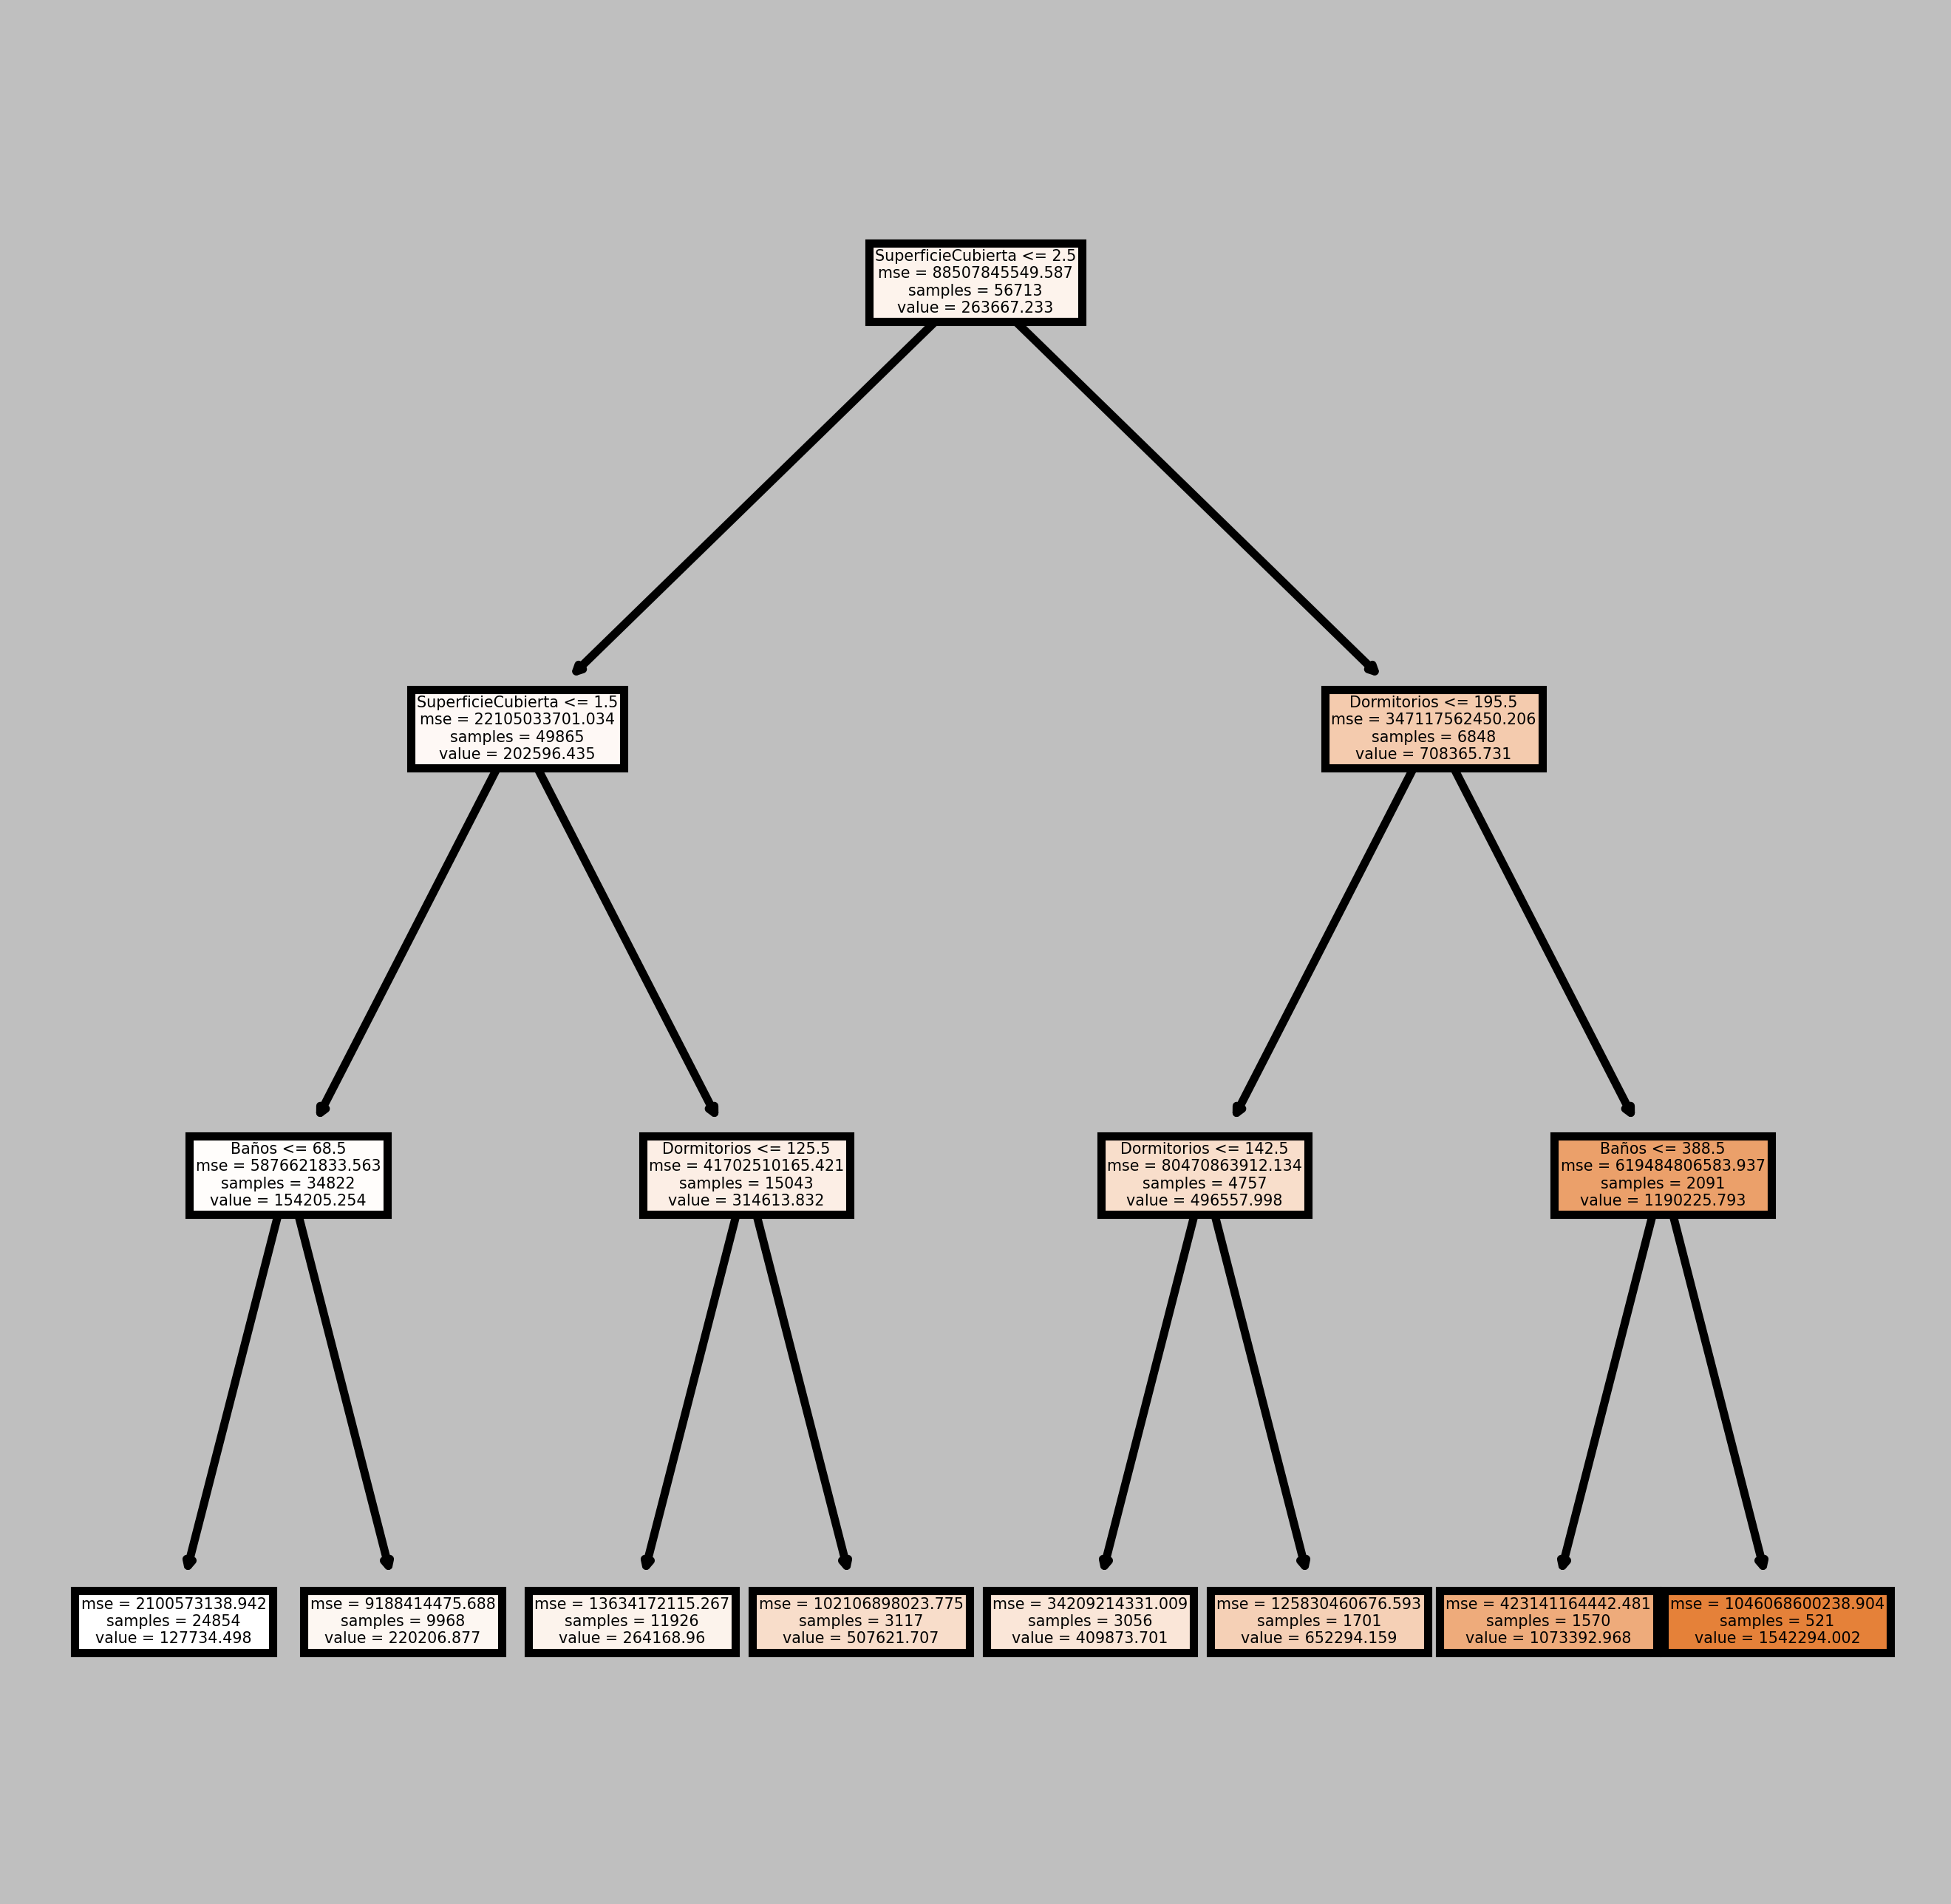

In [ ]:
arbol_5 = randomforestplot.estimators_[5]

with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_5,feature_names = dataFiltrada.drop("Precio",axis=1).columns, filled = True);
    fig.savefig('rf_individualtree.png')

El arbol anterior toma la variable superficie cubierta, dormitorios y baños como aquellas por las se realizan las preguntas de bifurcación del árbol
no usa la variable Ambientes.

**Veamos las variables más importantes para este arbol:**

In [ ]:
fi = pd.DataFrame({'feature': XX_train.columns, 'importance': arbol_5.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

index             feature  importance
0      4               Baños    0.631510
1      1  SuperficieCubierta    0.317269
2      2     SuperficieTotal    0.051220
3      0           Ambientes    0.000000
4      3         Dormitorios    0.000000

**Voy a elegir el arbol #50:**

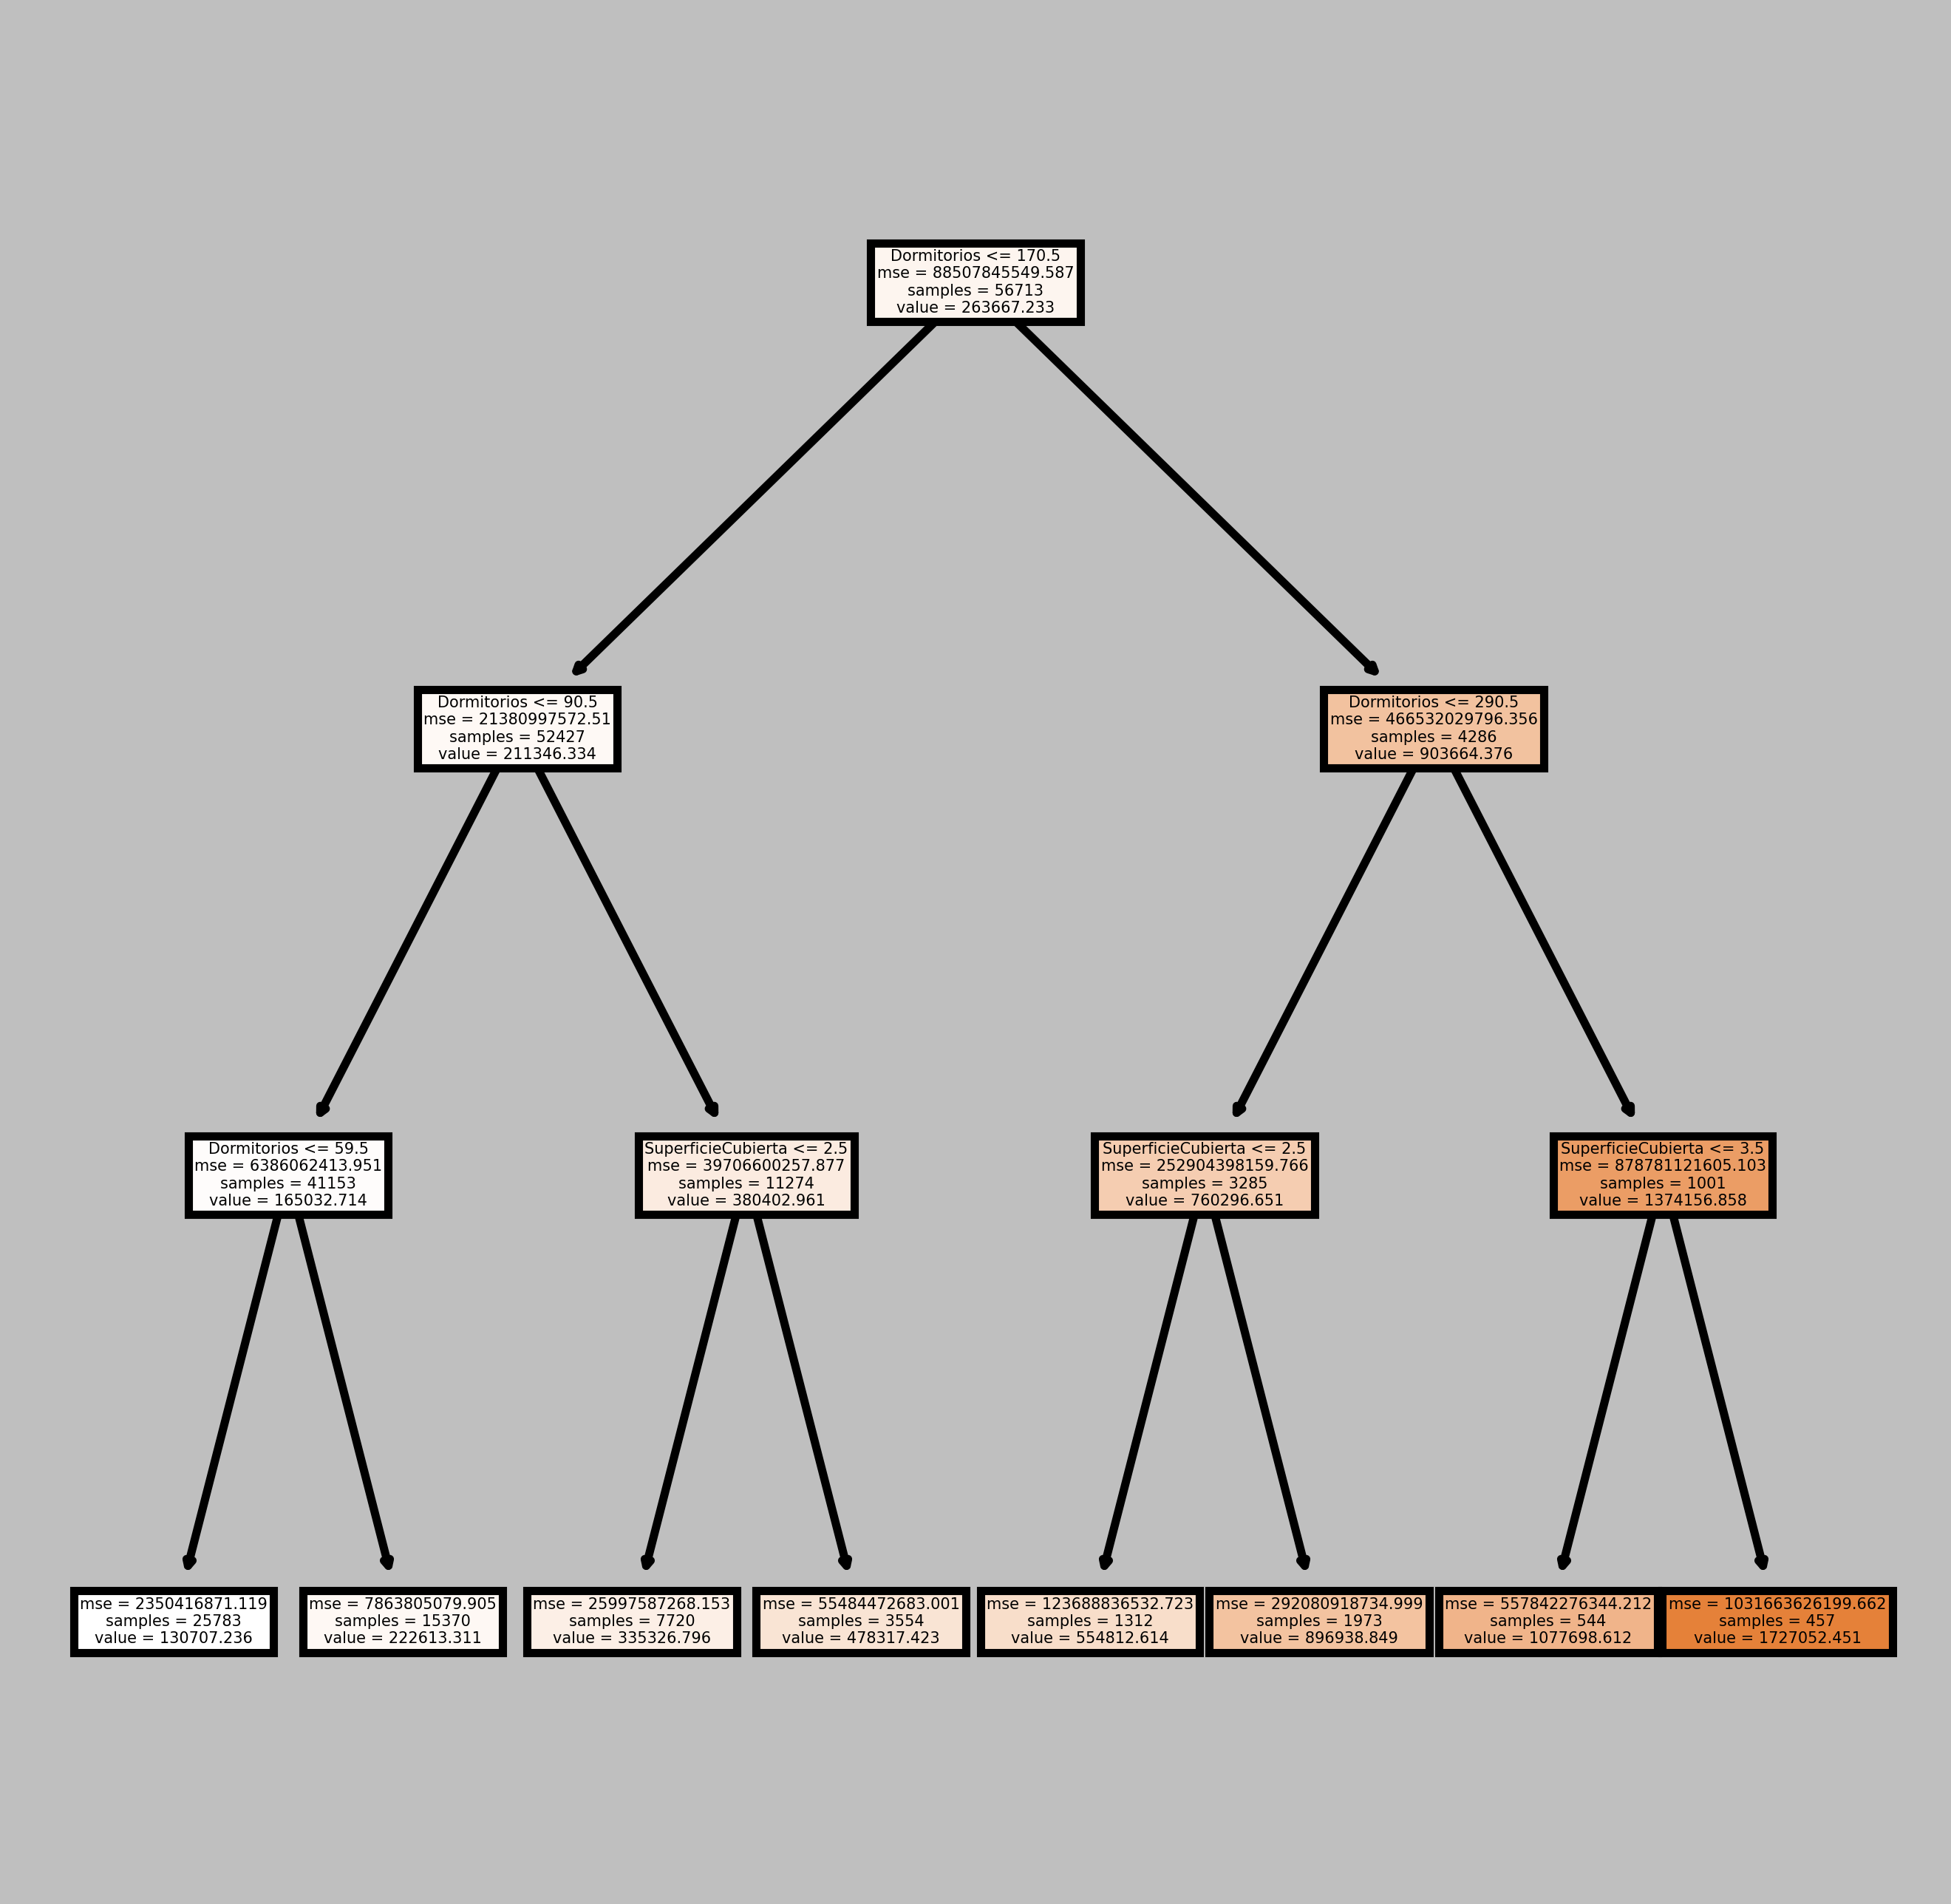

In [ ]:
arbol_50 = randomforestplot.estimators_[50]

with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_50,feature_names = dataFiltrada.drop("Precio",axis=1).columns, 
                   filled = True);
    fig.savefig('rf_individualtree.png')

Cuando el número de árbol es 50, ya su principal variable para empezar a evaluar es Dormitorios, tomando la superficie cubierta una relevancia menor en las hojas inferiores.

In [ ]:
fi = pd.DataFrame({'feature': XX_train.columns, 'importance': arbol_50.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

index             feature  importance
0      1  SuperficieCubierta    0.915701
1      4               Baños    0.084299
2      0           Ambientes    0.000000
3      2     SuperficieTotal    0.000000
4      3         Dormitorios    0.000000

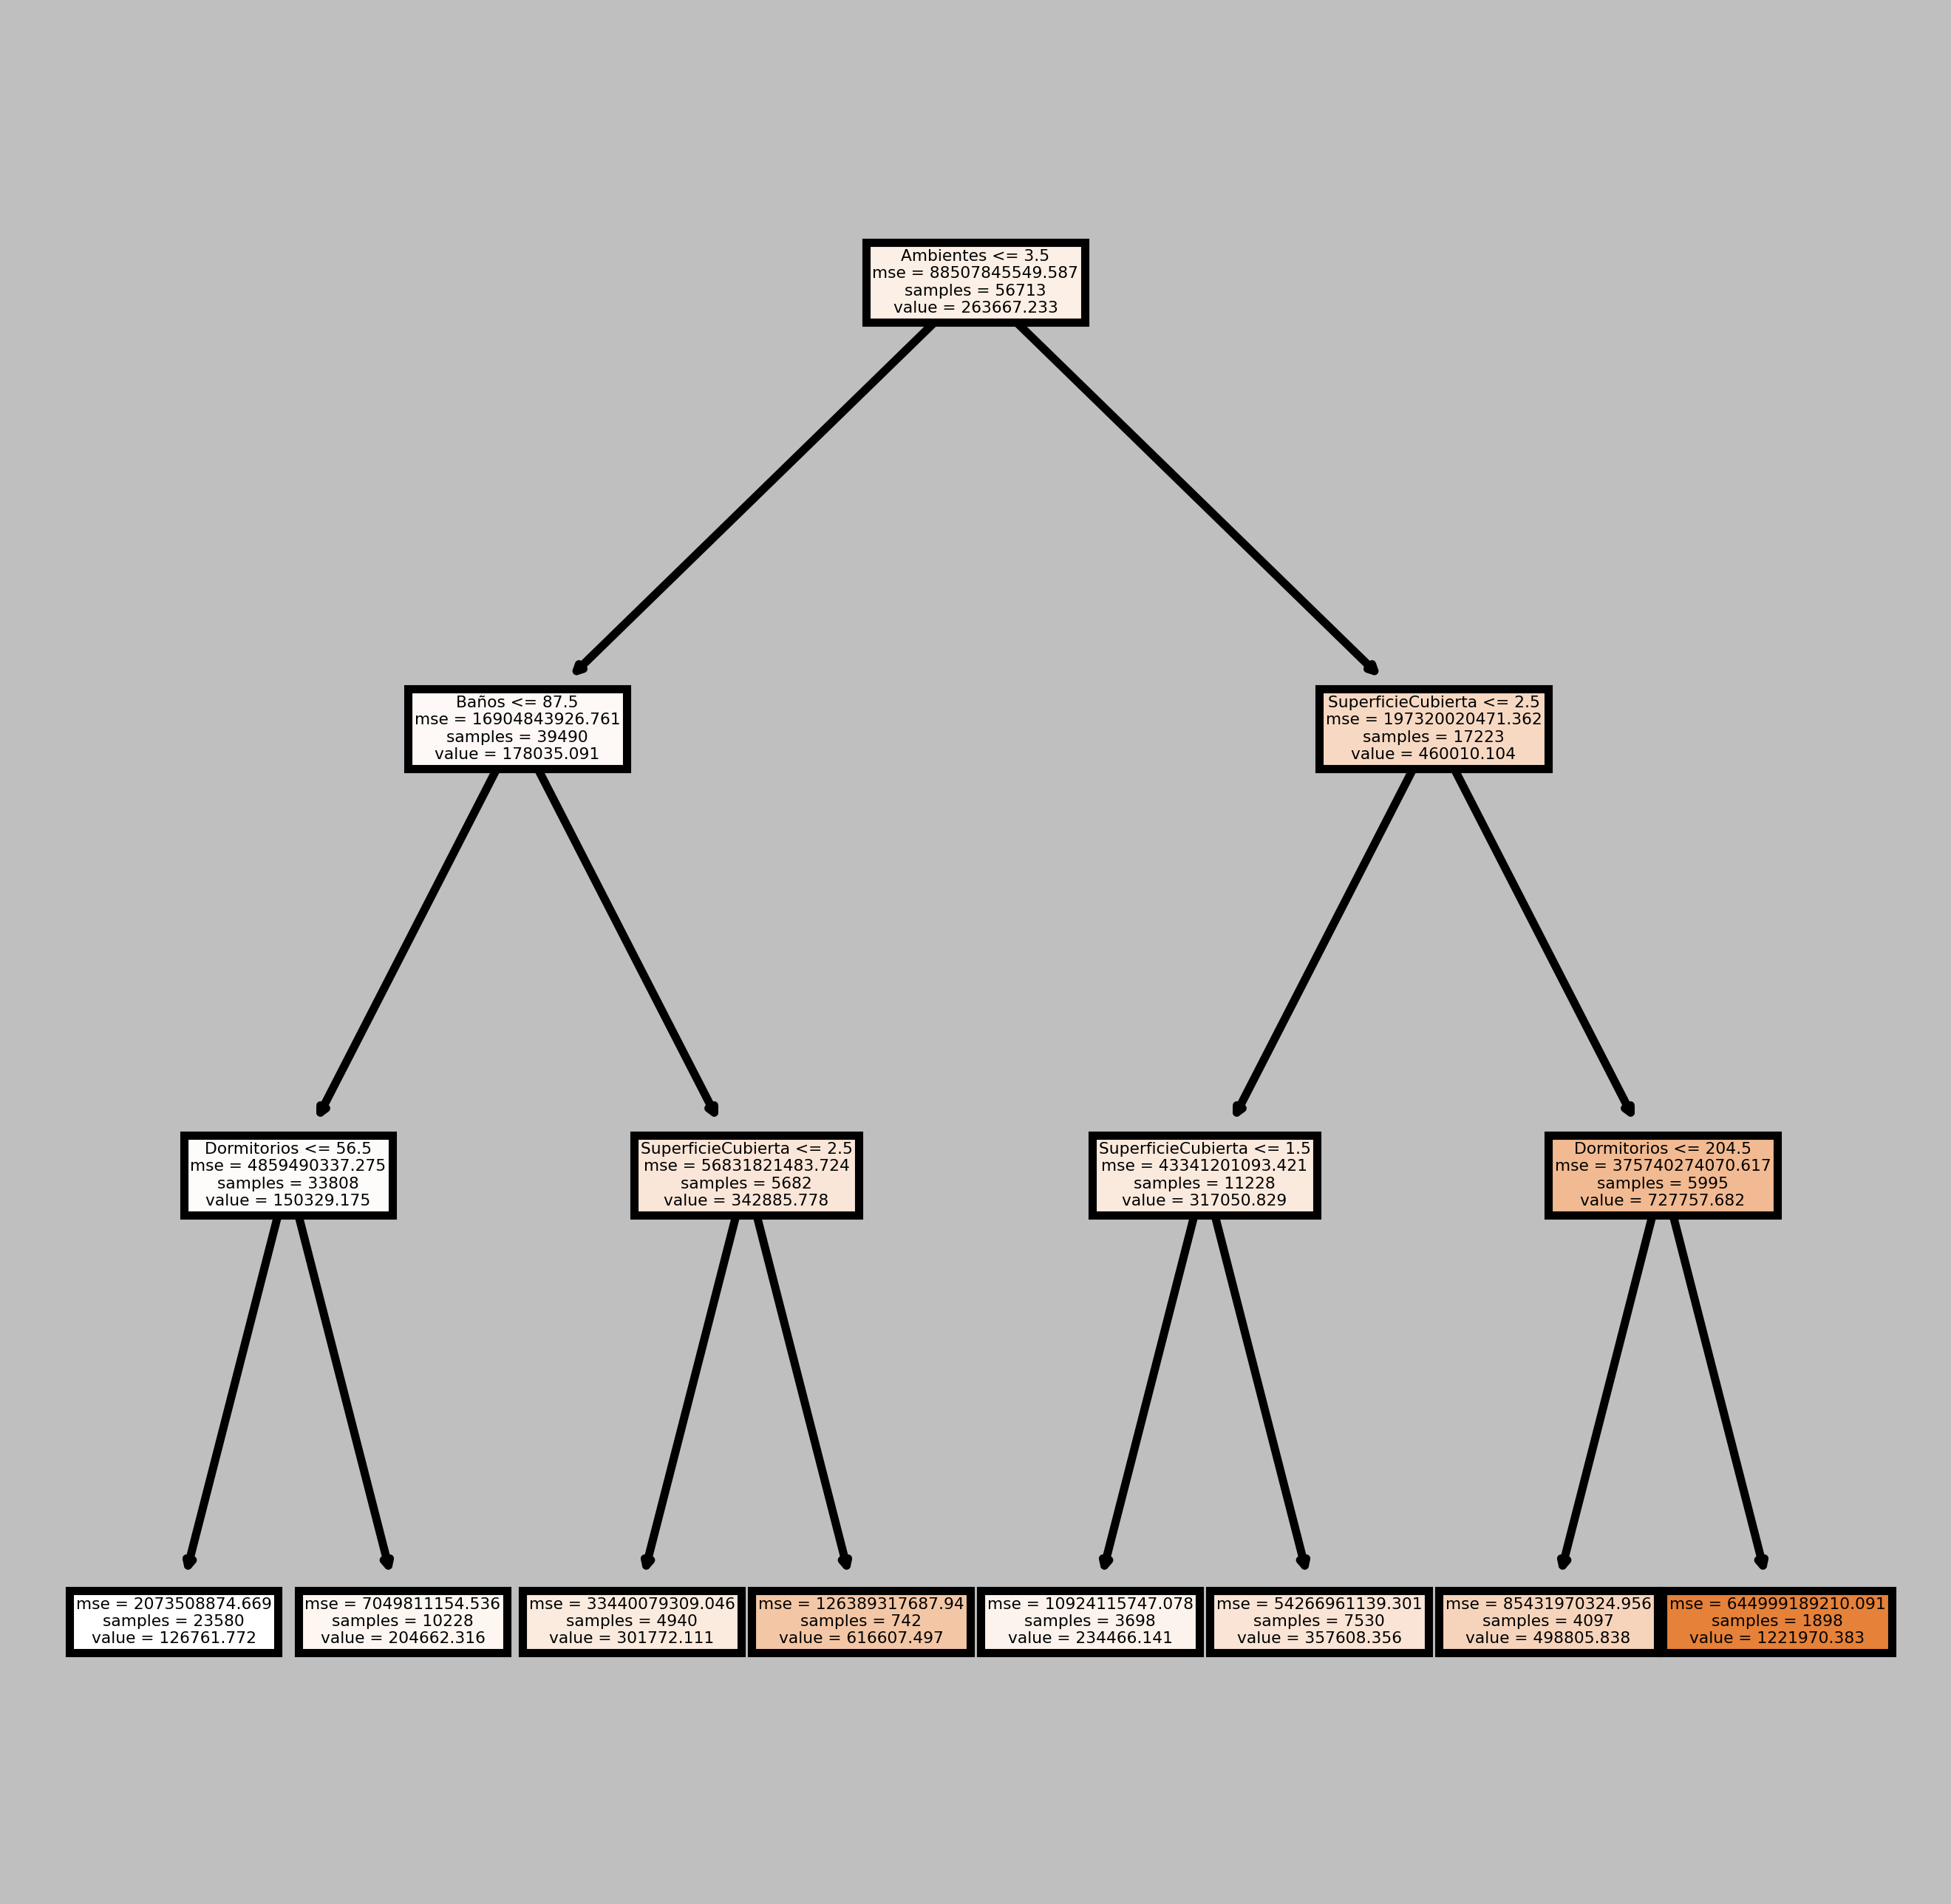

In [ ]:
arbol_80 = randomforestplot.estimators_[80]

with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_80,feature_names = dataFiltrada.drop("Precio",axis=1).columns, 
                   filled = True);
    fig.savefig('rf_individualtree.png')

**Veamos las variables más importartes para el árbol anterior:**

In [ ]:
fi = pd.DataFrame({'feature': XX_train.columns, 'importance': arbol_80.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

index             feature  importance
0      0           Ambientes    0.364455
1      4               Baños    0.290788
2      1  SuperficieCubierta    0.275819
3      2     SuperficieTotal    0.068938
4      3         Dormitorios    0.000000

**Al analizar cada uno de estos gráficos vemos que no es tan fácil deducir las variables de mayor importancia al menos visualmente, entonces por esto acompañé de cada gráfica con la instrucción de la importancia de cada una de las variables, como pudimos ver para cada árbol la importancia de las variables fue diferente.**

**Ahora voy a mostrar la importancia para todo el árbol en general:**

**Listemos las columnas:**

In [ ]:
XX_train.columns

Index(['Ambientes', 'SuperficieCubierta', 'SuperficieTotal', 'Dormitorios',
       'Baños'],
      dtype='object')


# **Veamos la importancia de cada una de las variables en orden de mayor a menor para todo el árbol:**

In [ ]:
fi = pd.DataFrame({'feature': XX_train.columns, 'importance': randomforest_analizado.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()
fi

index             feature  importance
0      1  SuperficieCubierta    0.410112
1      2     SuperficieTotal    0.308683
2      4               Baños    0.166485
3      0           Ambientes    0.068481
4      3         Dormitorios    0.046239

**Otra forma de verlo es a través de números, veamos:**

In [ ]:
randomforest_analizado.feature_importances_

array([0.06848134, 0.41011207, 0.30868311, 0.04623869, 0.16648479])

**Veámoslo gráficamente:**

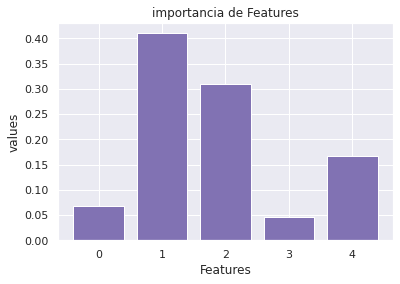

In [ ]:
importancia = randomforest_analizado.feature_importances_

for i,v in enumerate(importancia):
    
    plt.bar([x for x in range(len(importancia))], importancia)
plt.title("importancia de Features")
plt.ylabel("values")
plt.xlabel("Features")
plt.show()

**De acuerdo a lo anterior:**

**Primera pregunta:**

¿Qué variables fueron relevantes para el modelo para hacer una predicción? Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. 

¿En qué se diferencian esos árboles? ¿Por qué? 

Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

**Para el random Forest:**

1. SuperficieCubierta 
2. SuperficieTotal 

Son las que tienen mayor importancia

Seguida de:

3. Baños
4. Ambientes
5. Dormitorios

**Como se observó anteriormente con cada uno de los árboles, si se toman estos de manera individual la importancia de las variables varía.**

**Segunda pregunta:**

¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

- RMSE en Train es: 52460.938480967736
- RMSE en Test es: 125084.42215348568
- r2 en Train es: 0.9689050157168049
- r2 en Test es: 0.8287820884639328

**Puedo deducir que hay una diferencia de un poco más del doble entre el RMSE entre el train y el test, llevando a concluir que este Random Forest, sufre de varianza. **

**Recordemos que:**

- La varianza es la diferencia que hay en cada punto en train y en test.

- La varianza indica información sobre incertidumbre. 

- Una alta varianza indica que no hay tanta certidumbre.

- Si tengo más datos disminuye la varianza y aumenta la certidumbre.

- Una solución podría ser tener más muestras, para reducir la varianza, y aumentar la certidumbre y mejorar los modelos (Al agregar más muestras se espera que sea cada vez más parecido a la población.)

- De todas maneras nosotros como analista de datos debemos tener en cuenta que si tengo un número de muestra suficientemente significativo, cualquier modelo me serviría.
- Y que cada modelo tiene sus restricciones.

Veo acá que hay un mejor comportamiento en el train que en el test.

Un análisis sobre estos valores, y sobretodo en train, nos permite determinar que estamos ante un caso de sesgo bajo(esto sera desarrollado en futuras lineas)

Pero el punto realmente importante aparece al momento de ver el RMSE de test, aqui se hace presente que Random Forest sufre de varianza. 

Una solucion simple seria agregar mas datos para reducir la varianza, esto a costa de aumentar el sesgo del modelo (caso de compensacion entre sesgo y varianza).




**Lo que podríamos hacer es mejorar el randomforest y voy a usar el GridSearch con validación cruzada para optimizar los hiperparámetros, así puedo determinar cuál es el mejor modelo.**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, oob_score = True, random_state = 42)
random_forest_optimal_params = GridSearchCV(estimator= rf , 
                             param_grid=param_grid_2,
                             scoring='neg_root_mean_squared_error',
                             verbose=0,
                             cv=5)

In [ ]:
random_forest_optimal_params.fit(XX_train,yy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
print("Mejores parametros en train: "+str(random_forest_optimal_params.best_params_))
print("Mejor Score en train: "+str(random_forest_optimal_params.best_score_)+'\n')
resultados_rf_train = pd.DataFrame(random_forest_optimal_params.cv_results_)
resultados_rf_train

Mejores parametros en train: {'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Mejor Score en train: -125090.19754116047



mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       6.072887      0.086303  ...     6923.466641                2
1       6.040494      0.024856  ...     6907.010108                1

[2 rows x 17 columns]

In [ ]:
RandomForest_Con_GridSearch_Train = int(abs(-125090.19754116047))

**Veamoslo para test:**

In [ ]:
random_forest_optimal_params.fit(XX_test,yy_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
print("Mejores parametros en test: "+str(random_forest_optimal_params.best_params_))
print("Mejor Score en test: "+str(random_forest_optimal_params.best_score_)+'\n')
resultados_rf_test = pd.DataFrame(random_forest_optimal_params.cv_results_)
resultados_rf_test

Mejores parametros en test: {'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
Mejor Score en test: -143628.96115147916



mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       2.785170      0.044287  ...    10342.257201                2
1       2.771532      0.018322  ...    10364.511028                1

[2 rows x 17 columns]

In [ ]:
RandomForest_Con_GridSearch_Test = int(abs(-143628.96115147916))

# 20210609 - LUEGO DE CORRECCIÓN DE PRIMERA ENTREGA POR EL MENTOR - AGREGO ACÁ LOS DISTINTOS ERRORES PARA LOS MODELOS QUE ESTOY COMPARANDO

**Muestro acá los errores de los distintos árboles evaluados, tanto el que se optimizó con GridSearch como el que no.**

In [ ]:
model_performances_3=pd.DataFrame({'Modelo':['RandomForest_Sin_GridSearch_Train','RandomForest_Sin_GridSearch_Test','RandomForest_Con_GridSearch_Train','RandomForest_Con_GridSearch_Test'],
                                 'Erorres RMSE':[random_forest_rmse_train_sin_GridSearch,random_forest_rmse_test_sin_GridSearch,RandomForest_Con_GridSearch_Train,RandomForest_Con_GridSearch_Test]})

model_performances_3.sort_values(by = "Erorres RMSE",ascending=True)

Modelo  Erorres RMSE
0  RandomForest_Sin_GridSearch_Train         52460
1   RandomForest_Sin_GridSearch_Test        125084
2  RandomForest_Con_GridSearch_Train        125090
3   RandomForest_Con_GridSearch_Test        143628

**Conclusión:** Dado lo anterior el randomforest al ejecutarlo sin GridSearch tuvo un buen desempeño en train, más no tanto test, algo que nos permite deducir que hay varianza en el modelo.

Si vemos el RandomForest con GridSearch tuvo un desempeño muy bueno en train y test en cuando a cercanìa de los dos indicadores, yo me quedarìa con el segundo.

Siento que el modelo acierta con un número de estimators mayor a 100, de ahí para adelante diría que tiende a tener un muy adecuado desempeño.

**Como se puede ver acá muestro los distintos errores RMSE para los modelos de Random Forest que evalué, organicé mejor la información para que se vea más clara y entendible.**

# 20210609 - ADEMÀS DE LA CORRECIÓN ANTERIOR, VOY A MOSTRAR LAS CORRECCIONES REALIZADAS UNA VEZ ENTREGUÉ EL PROYECTO LA PRIMERA VEZ, DONDE SE ME INDICÓ:

# PARTE C - Errores
Rehacer. Mostrar los errores que presenta uno de los modelos al predecir. Interpretar. ¿Dónde es mayor el error? ¿dónde acierta?

Es decir no se refiere a una métrica puntual si no la distribución.

# **Distribucion de Errores:**


**Para no devolverme en lo ya realizado, voy a volver a ejecutar el random forest para que sea de más fácil revisión, siendo este es uno de los modelos a pre-decir - vamos a ver el modelo sin optimizar y con optimización, para poder comparar los resultados y responder a las preguntas**

In [ ]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size = 0.3, random_state=42)

In [ ]:
randomf_new = RandomForestRegressor(n_estimators=100, oob_score = True, random_state = 42)

In [ ]:
randomf_new.fit(XX_train,yy_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_train_pred = randomf_new.predict(XX_train)
y_test_pred = randomf_new.predict(XX_test)

**Errores en train para el random forest:**

In [ ]:
train_rmse = np.sqrt(mean_squared_error(yy_train, yy_train_pred))
train_rmse

70095.58150028698

**Errores en test para el random forest:**

In [ ]:
test_rmse = np.sqrt(mean_squared_error(yy_test, yy_test_pred))
test_rmse

147795.5264469302

In [ ]:
param_grid = {
    'max_depth':[25,30],
    'max_features':['auto'],
    'n_estimators': [100],
    'min_samples_split':[2]}

random_forest_optimo = GridSearchCV(estimator= rf , 
                             param_grid=param_grid_2,
                             scoring='neg_root_mean_squared_error',
                             verbose=0,
                             cv=5)

**Para el train:**

In [ ]:
random_forest_optimo.fit(XX_train,yy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

**Para el test:**

In [ ]:
random_forest_optimo.fit(XX_test,yy_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=True, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
def Graficar_modelo(X_train, X_test, y_train, y_test, modeloRecibido):
    
    modeloRecibido.fit(X_train, y_train)
    y_train_pred = modeloRecibido.predict(X_train)
    y_test_pred = modeloRecibido.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de errores (y - y_predicho) y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "b")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (En USD)", fontweight = "black", fontsize = 15)
    plt.ylabel("Valores pre-dichos del Precio (En USD)", fontweight = "black", fontsize = 15)
    plt.xticks(rotation = 45, horizontalalignment="right")

Raíz del error cuadrático medio en Train: 65039.1813055182
Raíz del error cuadrático medio en Test: 124625.32054798903


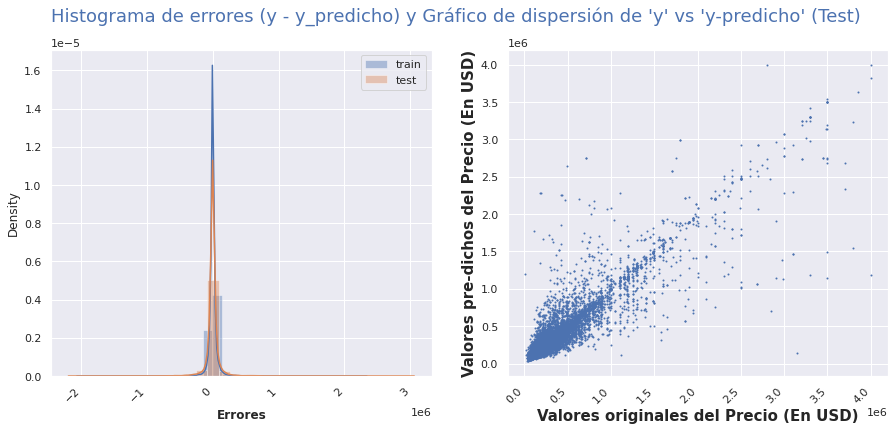

In [ ]:
Graficar_modelo (XX_train, XX_test, yy_train, yy_test, random_forest_optimo)

# Conclusiones de esta gráfica de distribución de errores:

**¿Dónde es mayor el error? ¿dónde acierta?**

**Estos son los valores en train y test sin optimizar el randomforest es decir sin GridSearch:**

- RMSE en train: 70095.5815002869
- RMSE en test: 147795.5264469302

**Ahora si se optimizan los parámetros tal como muestro a continuación**

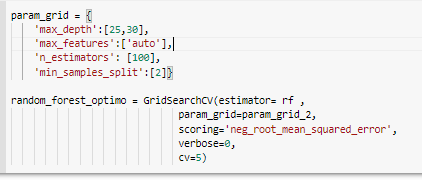

**Podemos obtener estos valores:**

- RMSE en Train: 65039.1813055182
- RMSE Test: 124625.32054798903

Ante las preguntas:
**¿Dónde es mayor el error? ¿dónde acierta?**

El mayor valor es cuando NO se realiza una adecuada optimización de parámetros, en este caso funcionó muy bien al hacerlo con GridSearch y con 5 folds, siendo bajo estas circunstancias cuando se obtiene un menor valor.

Acierta cuando hay optimización de hiperparámetros con GridSearch, tal como lo he venido indicando.



# 20210609 - HASTA ACÁ LAS MEJORAS SUGERIDAS EN LA PRIMERA REVISIÓN POR LA MENTORA.

# Conclusión general de mi trabajo y la metodología usada:

Siento haber cumplido con la hipótesis planteada, fue muy acertada la metodologia implementada, pues se descubrió a lo largo de todo el trabajo y con todos los experimentos realizados, que las metricas de error fueron muy bajas, sobre todo en los modelos mas robustos como XGBoos, Random Forest y Bagging Regressor.

Me encantó todo lo que pude poner en práctica a cerca de la forma de abordar el pre - procesamiento, y que con una correcta imputacion de valores, de eliminacion de outliers, de escalado, de encoding y de reducción de dimensionalidad, logré transformar los datos del sprint 1 y que las métricas hayan sido bastante certeras y confiables.

Es de aclarar que siempre se puede encontrar formas de mejorar las métricas y la metodologia usada, podría ser teniendo más variables como parques, bibliotecas, colegios, universidades, sin embargo dado que no se tienen estas, encontramos que las variables Barrios, superficie cubierta y Baños, salieron siendo unos muy buenos predictores.

Quizá el haber creado nuevas características o variables, podríamos a través de distintas pruebas,  logrado mejorar nuestros resultados. 

De todas maneras así con todo el análisis que realicé me siento satisfecha y quedo a la espera de la revisión de mi observador.

**Nota:** Agradezco la paciencia porque algunas instrucciones de mi trabajo tardan en ejecutarse, sin embargo lo hacen sin errores.